In [5]:
import sys
sys.path.append('../../src')
from moseq_analysis_tools import *
from freeze_analysis_tools import *
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import re

In [13]:
# load the data

kp_loc = r'C:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\kpms_1s_bout_result.h5'
ff_loc = r'C:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\freeze_frame_index_all.csv'
meta_loc = r'G:\Shared drives\Turi_lab\Data\PTSD_project\metadata.csv'

processor = MoseqProcessor(kp_loc)

ff_data = pd.read_csv(ff_loc)
def remove_leading_zeros(cohort_id):
    # Use regex to find the last numeric segment and remove leading zeros
    return re.sub(r'_(\d+)$', lambda m: f"_{int(m.group(1))}", cohort_id)

# Apply this function to the 'cohort_id' column
ff_data['cohort_id'] = ff_data['cohort_id'].apply(remove_leading_zeros)
# ff_data.rename(columns={'t(sec)': 'time'}, inplace=True)
ff_data_1 = ff_data[ff_data['bouts'] == 1]
ff_data_125 = ff_data[ff_data['bouts'] == 1.25]
ff_data_15 = ff_data[ff_data['bouts'] == 1.5]
ff_data_175 = ff_data[ff_data['bouts'] == 1.75]
ff_data_2 = ff_data[ff_data['bouts'] == 2]

metadata = pd.read_csv(meta_loc)
metadata['cohort_id'] = metadata['cohort_id'].str.replace('-', '_', regex=False)
metadata['young'] = metadata['young'].map({True: 'Young Adult', False: 'Adult'})


ff_data_1 = ff_data_1.merge(metadata, on='cohort_id', how='left')

In [14]:
metadata

cohort_id condition   sex  age_at_sefla  young
0     ptsd1_5HT2Afl05a_5   control  male     16.142857  Adult
1     ptsd1_5HT2Afl05a_7   control  male     16.142857  Adult
2    ptsd1_5HT2ACre01a_3   control  male     13.285714  Adult
3        ptsd1_sert26a_3   control  male     17.714286  Adult
4      ptsd1_5HT2Afl5a_6      sefl  male     16.142857  Adult
..                   ...       ...   ...           ...    ...
251          ptsd16_B4_1   control  male           NaN  Adult
252          ptsd16_B4_2   control  male           NaN  Adult
253          ptsd16_B4_3   control  male           NaN  Adult
254          ptsd16_B4_4   control  male           NaN  Adult
255          ptsd16_B4_5   control  male           NaN  Adult

[256 rows x 5 columns]

In [15]:
bouts_df, summary = compare_freeze_bout_lengths_by_minute(ff_data_1)

In [9]:
# plot_freeze_duration_pointplot(
#     bouts_df, group_cols=['condition'], subset_col='day')

c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\../../src\freeze_analysis_tools.py:281: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.loc[:, 'interaction'] = subset_df[group_cols[0]].astype(str)
c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\../../src\freeze_analysis_tools.py:281: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subse

(<Figure size 1400x600 with 2 Axes>,
 array([<Axes: title={'center': 'Day: recall1'}, xlabel='Minute Bin', ylabel='Freezing Duration (s)'>,
        <Axes: title={'center': 'Day: recall4'}, xlabel='Minute Bin', ylabel='Freezing Duration (s)'>],
       dtype=object))

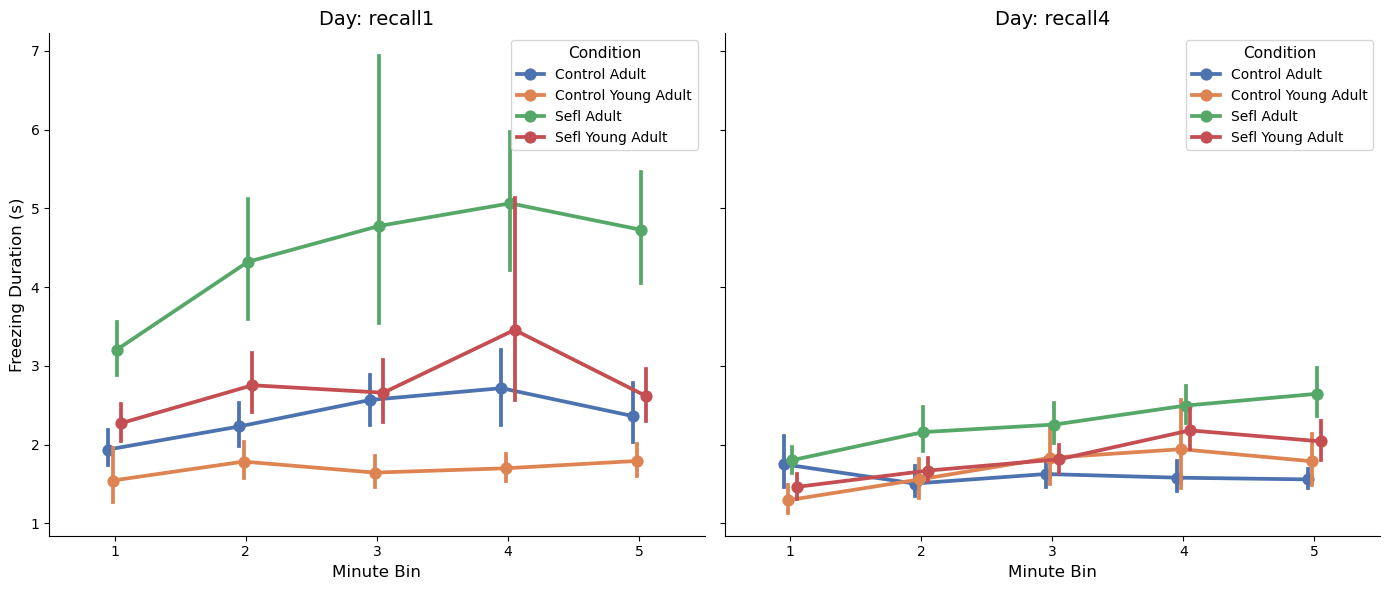

In [16]:
plot_freeze_duration_pointplot(
    bouts_df, group_cols=['condition', 'young'], subset_col='day')

c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\../../src\freeze_analysis_tools.py:281: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.loc[:, 'interaction'] = subset_df[group_cols[0]].astype(str)
c:\Users\Chehaoy\OneDrive - New York State Office of Information Technology Services\Documents\els_project\notebooks\novak_analyses\../../src\freeze_analysis_tools.py:281: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subse

(<Figure size 1400x600 with 2 Axes>,
 array([<Axes: title={'center': 'Day: recall1'}, xlabel='Minute Bin', ylabel='Freezing Duration (s)'>,
        <Axes: title={'center': 'Day: recall4'}, xlabel='Minute Bin', ylabel='Freezing Duration (s)'>],
       dtype=object))

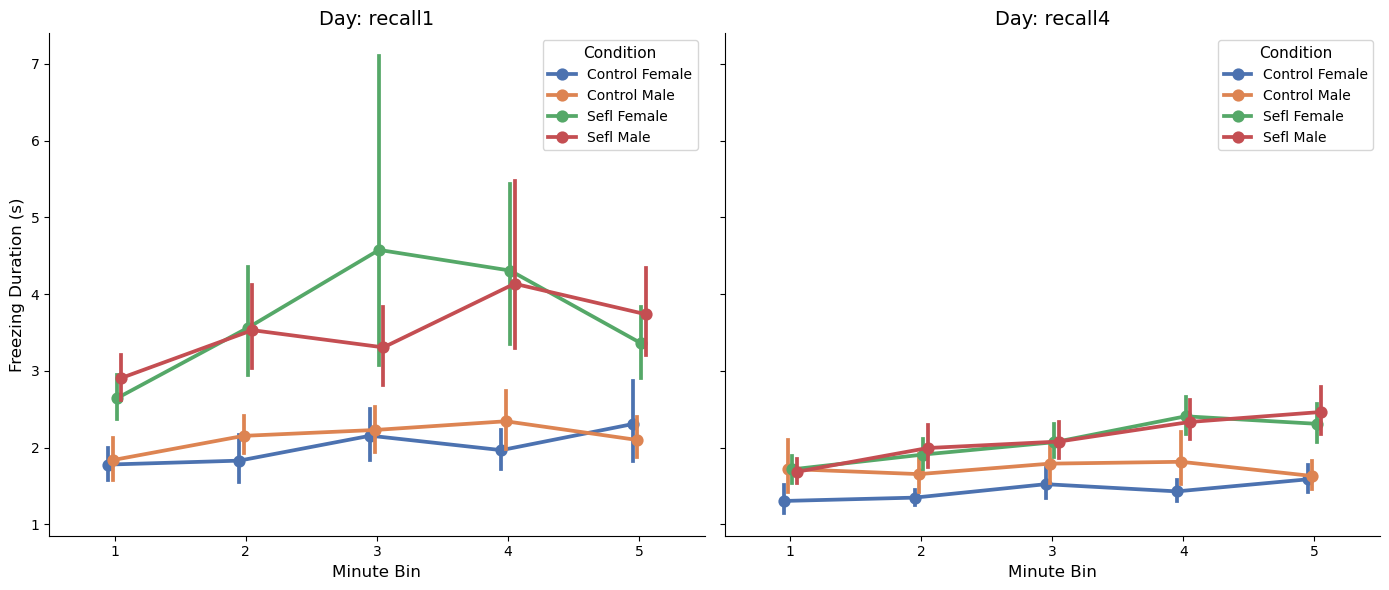

In [17]:
plot_freeze_duration_pointplot(
    bouts_df, group_cols=['condition', 'sex'], subset_col='day')

In [4]:
# construct 'cohort_id', 'day' and 'time' column for kpms data 
kp_data = processor.load_data()
kp_data = create_time_column(kp_data, 3.75)
kp_data.head()

centroid_x  centroid_y   heading  syllable  latent_0  latent_1  latent_2  \
0  159.494005   75.727264 -1.553938         4 -0.921735  0.808401 -2.416171   
1  159.965390   75.417319 -0.739052         4  0.765149 -3.785707  0.027174   
2  158.154192   77.594651  0.357370         4  0.753083  8.687163 -0.260404   
3  154.379016   78.265231  0.117665         4 -0.414891  5.617122  0.616389   
4  151.018244   79.731327 -0.274859         4  0.103196  1.857511  2.268315   

    latent_3  latent_4 cohort_id      day      time  
0  -0.477190 -0.558217  ptsd2_81  recall1  0.000000  
1   7.442314  3.071097  ptsd2_81  recall1  0.266667  
2 -17.304289 -3.106319  ptsd2_81  recall1  0.533333  
3 -17.296831 -5.298874  ptsd2_81  recall1  0.800000  
4  -0.089864  1.012307  ptsd2_81  recall1  1.066667

In [5]:
# find all freeze transitions from freeze frame data 
freeze_transitions = find_freeze_transitions(ff_data_1)
freeze_transitions.head()

time transition_type cohort_id      day
0  34.44           onset  ptsd2_81  recall1
1  35.51          offset  ptsd2_81  recall1
2  60.86           onset  ptsd2_81  recall1
3  62.20          offset  ptsd2_81  recall1
4  87.29           onset  ptsd2_81  recall1

In [6]:
# extract kpms data around mobile/immobile swtiches 

kpms_mobile = extract_moseq_windows(kp_data, freeze_transitions, window_size=.6)
kpms_mobile.head()

syllable cohort_id      day       time  relative_time transition_type
0         1  ptsd2_81  recall1  33.866667      -0.533333           onset
1         1  ptsd2_81  recall1  34.133333      -0.266667           onset
2         1  ptsd2_81  recall1  34.400000       0.000000           onset
3         1  ptsd2_81  recall1  34.666667       0.266667           onset
4         1  ptsd2_81  recall1  34.933333       0.533333           onset

In [7]:
# plot the distribution of syllables around mobile/immobile switches

fig = px.histogram(kpms_mobile, x='syllable', 
                   color='transition_type',
                   marginal='rug')
fig.show()

In [8]:
syllable_freeze_df = calculate_syllable_freezing_proportion(
    kp_data, ff_data_1, 
    freeze_col='freeze', syllable_col='syllable', time_col='time')

In [9]:
top_5_freezing_syllables = syllable_freeze_df.nlargest(15, 'freezing_proportion')
print(top_5_freezing_syllables)

    syllable  total_count  freezing_count  freezing_proportion
47        47          433             146             0.337182
61        61          290              96             0.331034
54        54          394             121             0.307107
31        31         1612             477             0.295906
35        35         1350             380             0.281481
46        46         2057             564             0.274186
71        71          856             225             0.262850
27        27         2580             611             0.236822
5          5        78903           17569             0.222666
28        28         4970            1100             0.221328
24        24         4272             937             0.219335
44        44          130              25             0.192308
13        13         3318             635             0.191380
9          9        12015            2258             0.187932
1          1        54835           10281             0

In [10]:
freeze_syllable = [1, 5, 8]
kp_data['moseq_freeze'] = [1 if x in freeze_syllable else 0 for x in kp_data['syllable']]

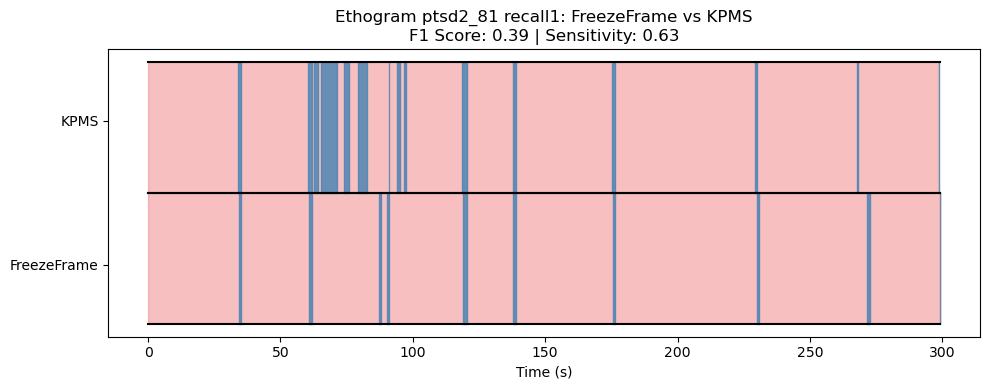

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd2_81, Day: recall1, F1 Score: 0.39, Sensitivity: 0.63


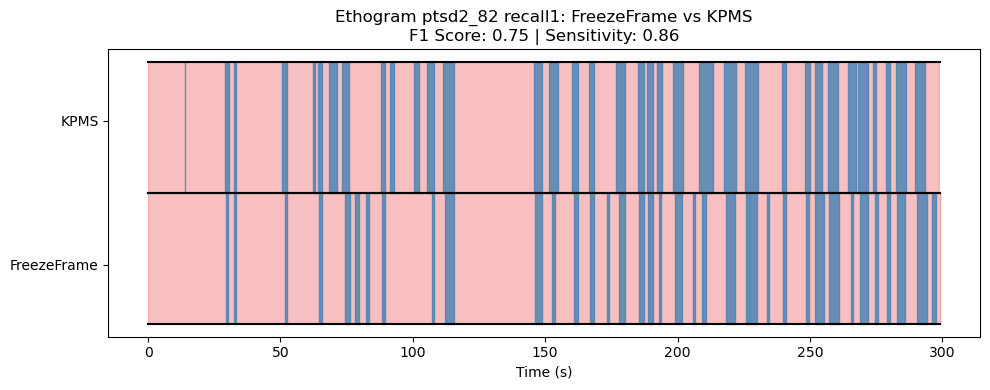

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd2_82, Day: recall1, F1 Score: 0.75, Sensitivity: 0.86


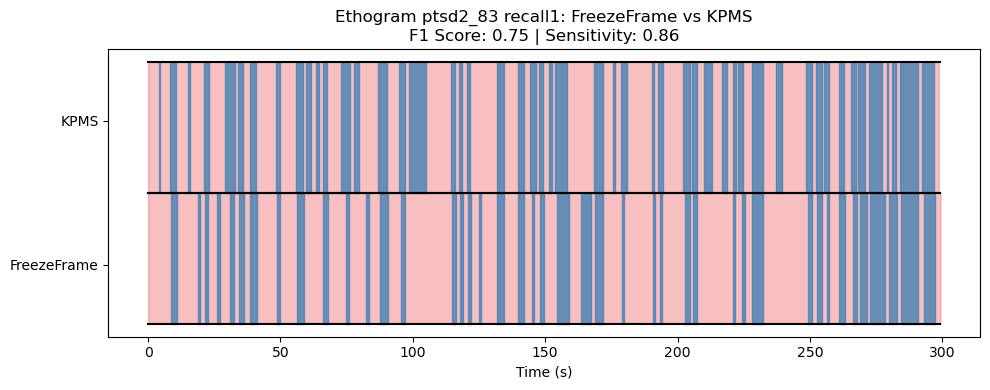

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd2_83, Day: recall1, F1 Score: 0.75, Sensitivity: 0.86


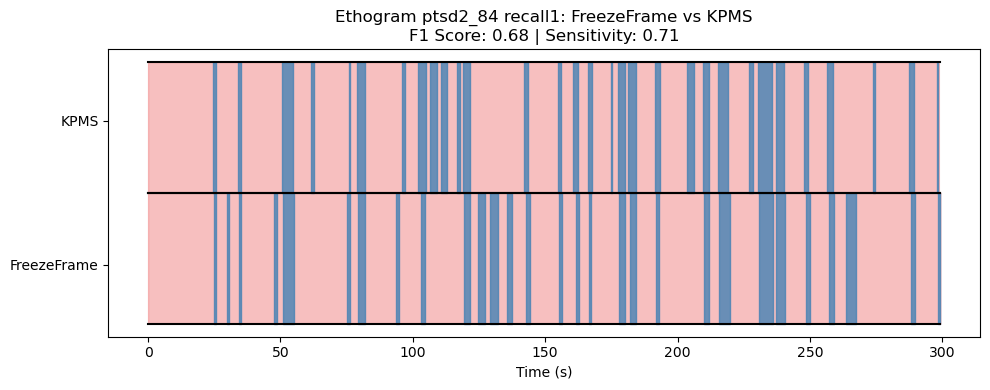

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd2_84, Day: recall1, F1 Score: 0.68, Sensitivity: 0.71


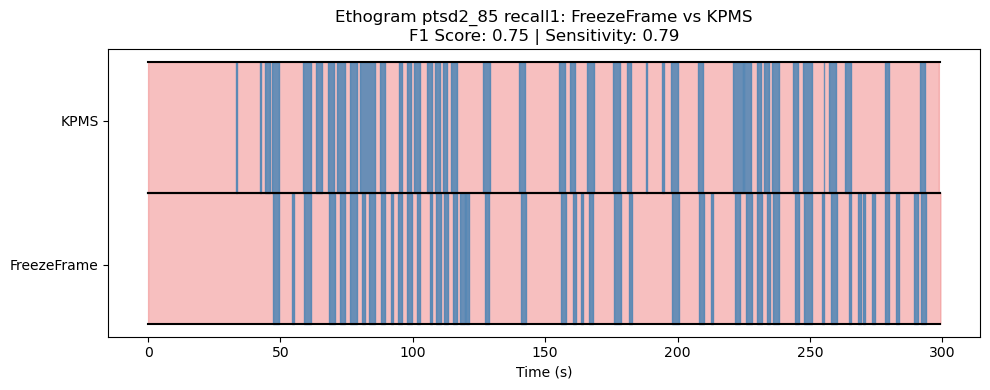

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd2_85, Day: recall1, F1 Score: 0.75, Sensitivity: 0.79


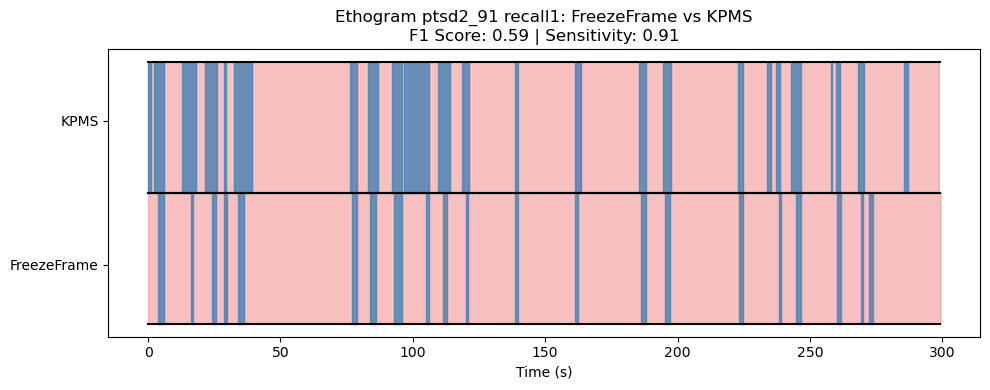

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd2_91, Day: recall1, F1 Score: 0.59, Sensitivity: 0.91


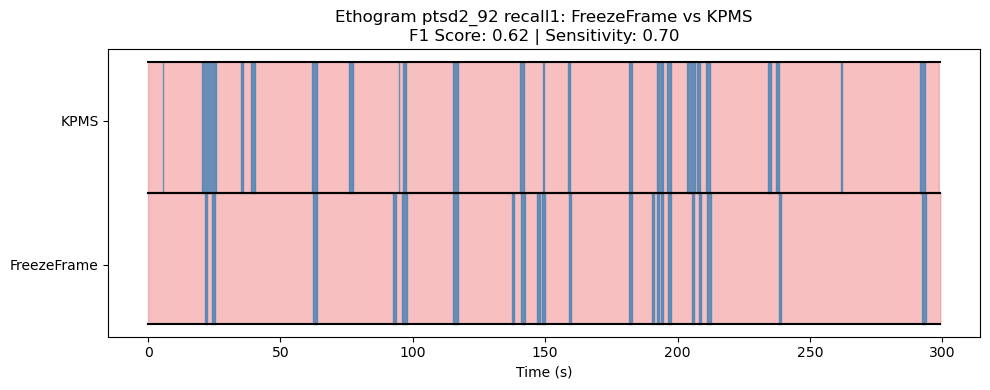

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd2_92, Day: recall1, F1 Score: 0.62, Sensitivity: 0.70


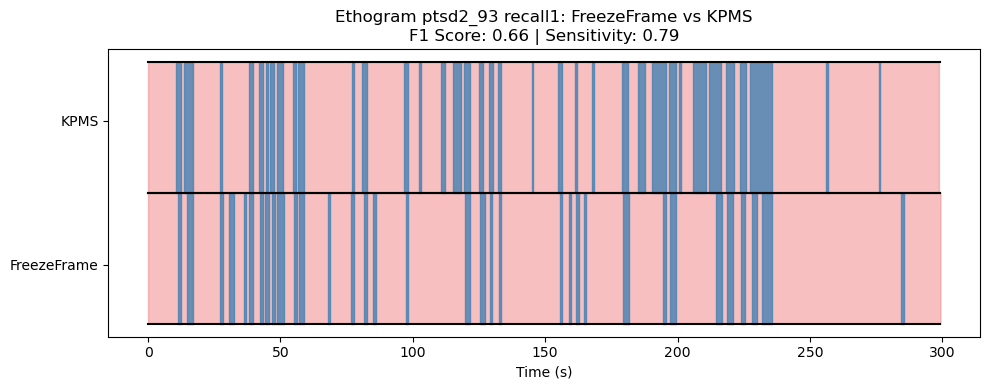

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd2_93, Day: recall1, F1 Score: 0.66, Sensitivity: 0.79


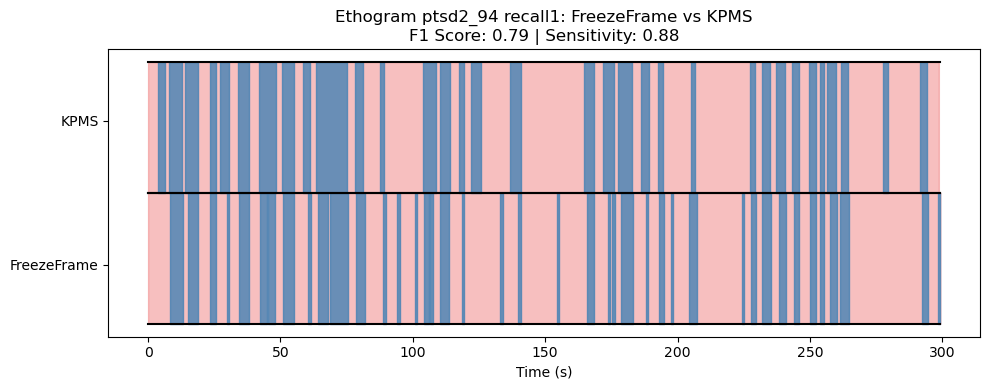

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd2_94, Day: recall1, F1 Score: 0.79, Sensitivity: 0.88


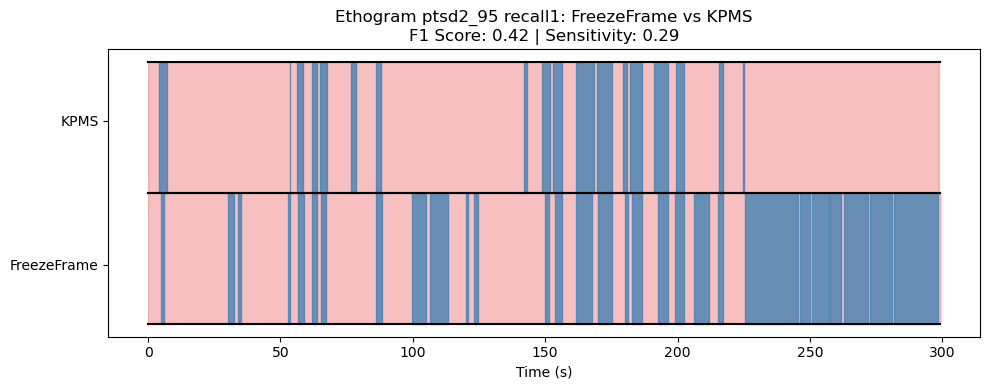

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd2_95, Day: recall1, F1 Score: 0.42, Sensitivity: 0.29


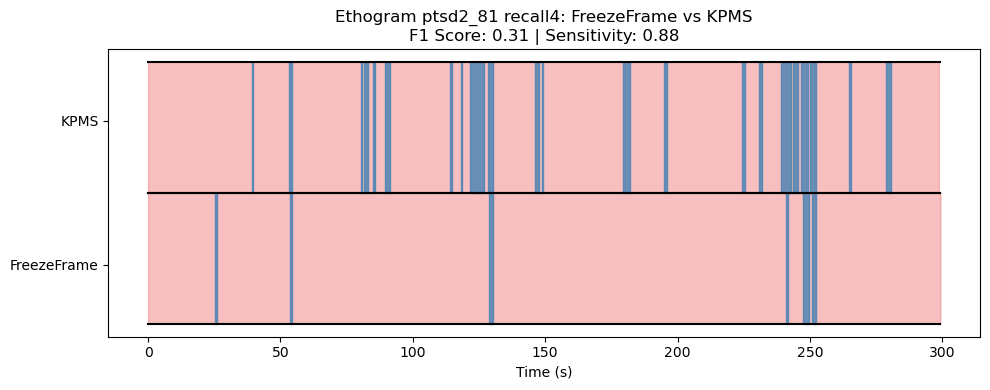

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd2_81, Day: recall4, F1 Score: 0.31, Sensitivity: 0.88


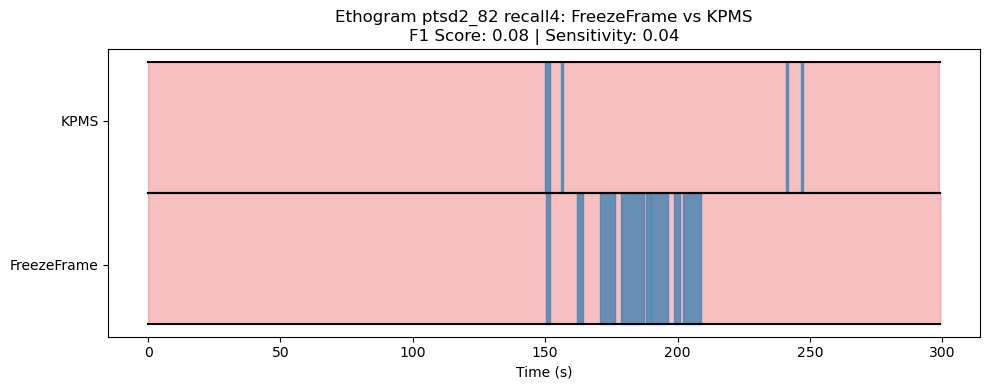

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd2_82, Day: recall4, F1 Score: 0.08, Sensitivity: 0.04


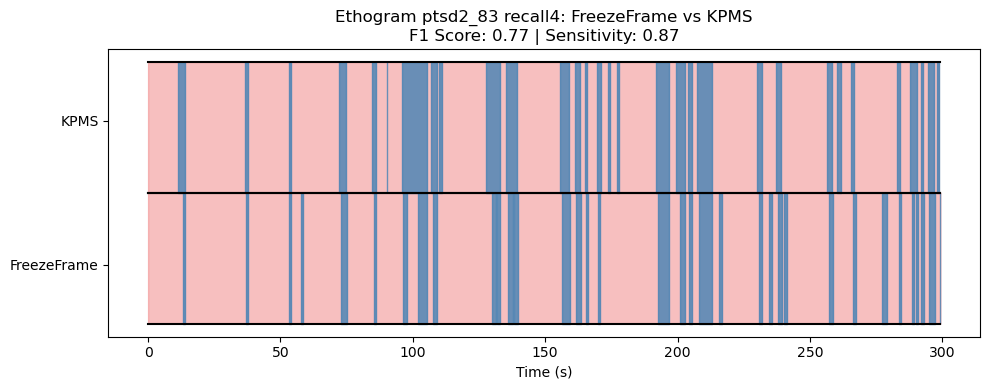

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd2_83, Day: recall4, F1 Score: 0.77, Sensitivity: 0.87


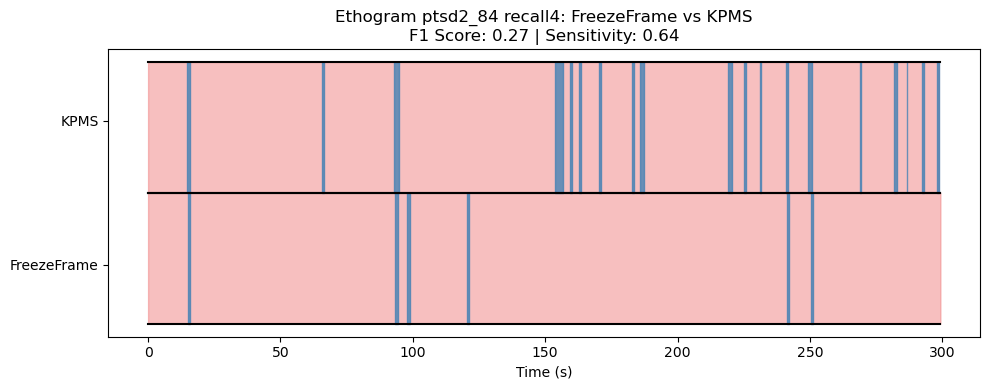

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd2_84, Day: recall4, F1 Score: 0.27, Sensitivity: 0.64


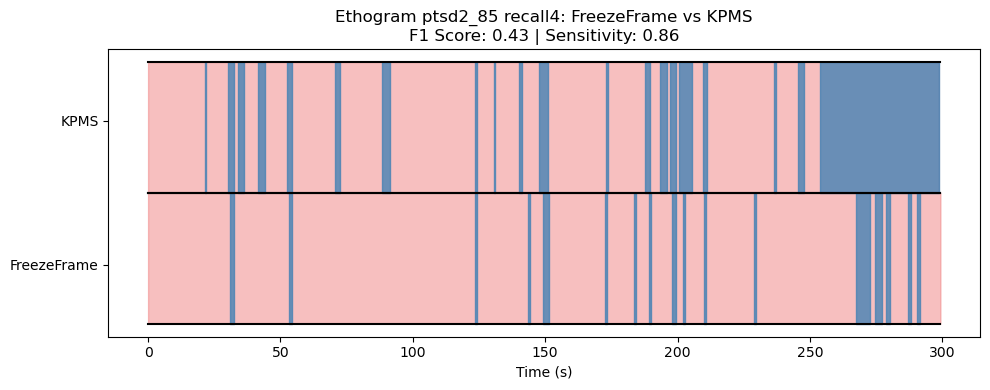

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd2_85, Day: recall4, F1 Score: 0.43, Sensitivity: 0.86


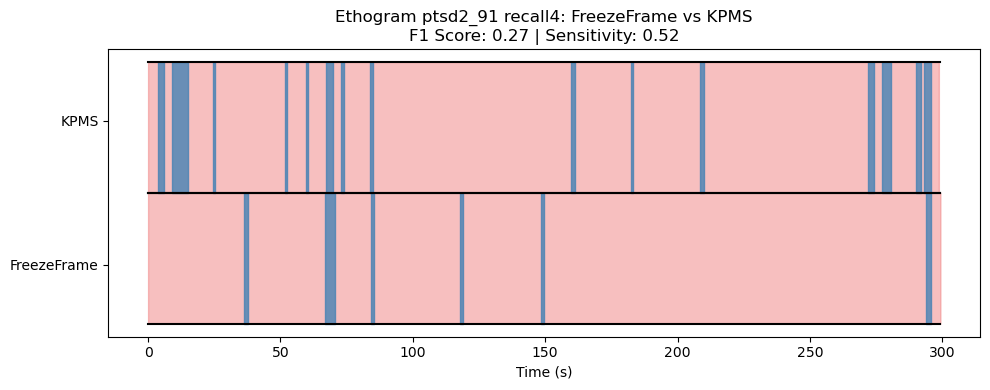

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd2_91, Day: recall4, F1 Score: 0.27, Sensitivity: 0.52


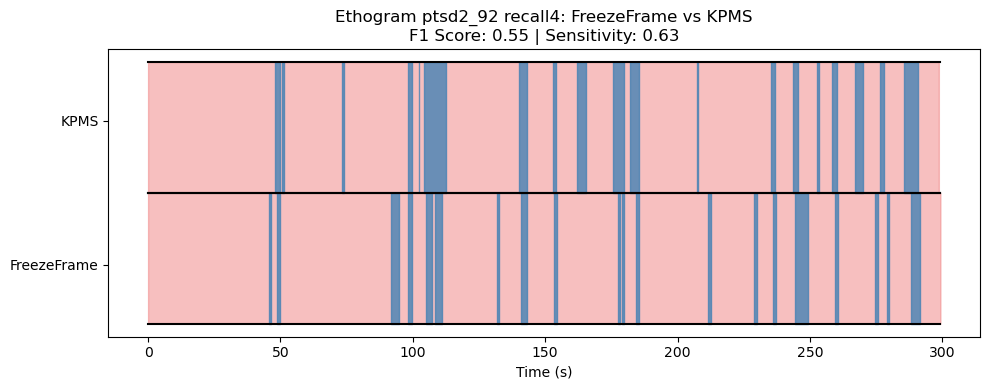

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd2_92, Day: recall4, F1 Score: 0.55, Sensitivity: 0.63


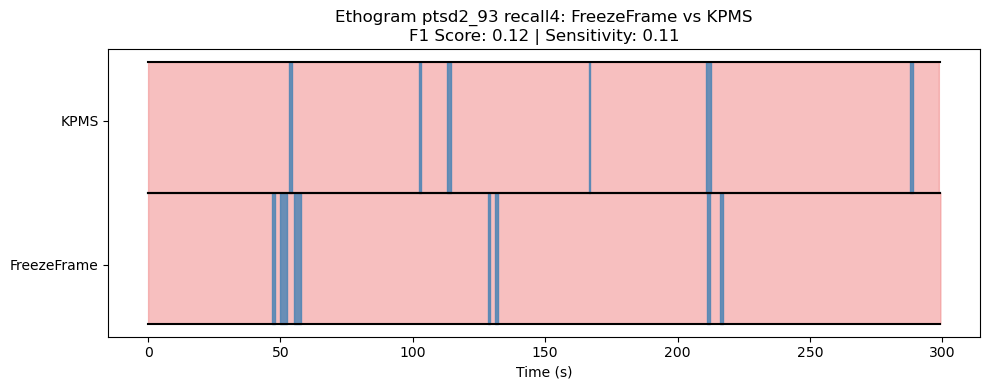

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd2_93, Day: recall4, F1 Score: 0.12, Sensitivity: 0.11


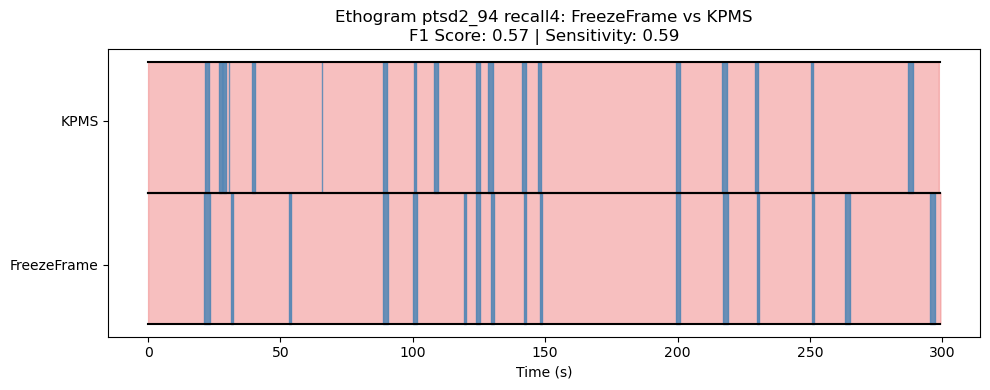

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd2_94, Day: recall4, F1 Score: 0.57, Sensitivity: 0.59


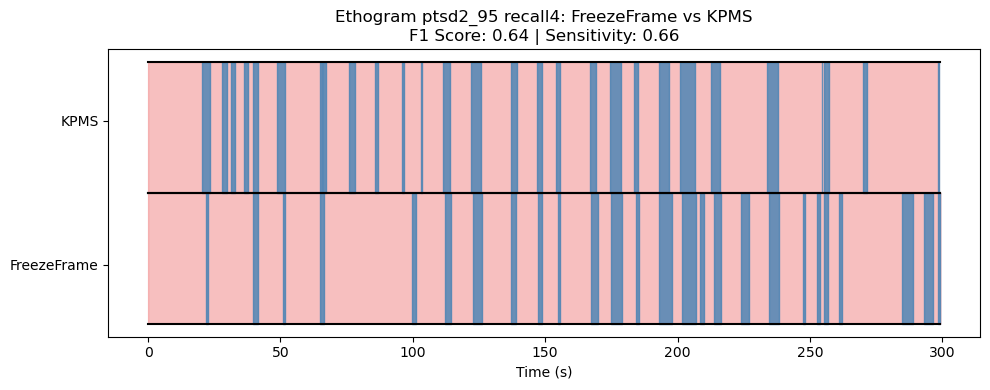

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd2_95, Day: recall4, F1 Score: 0.64, Sensitivity: 0.66


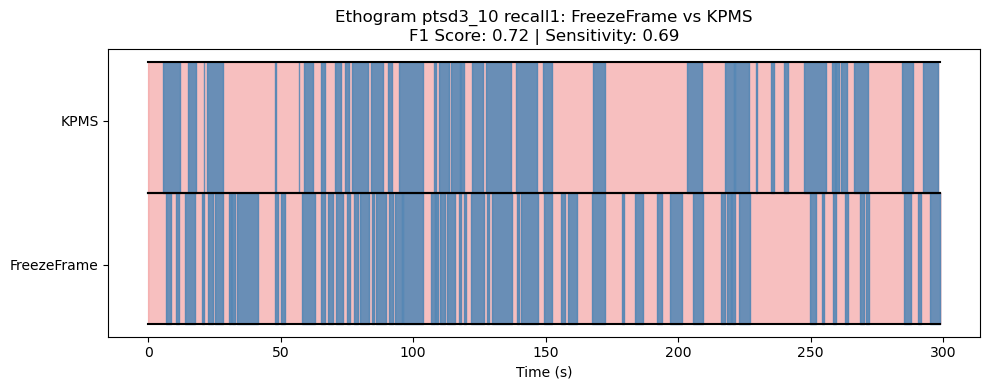

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd3_10, Day: recall1, F1 Score: 0.72, Sensitivity: 0.69


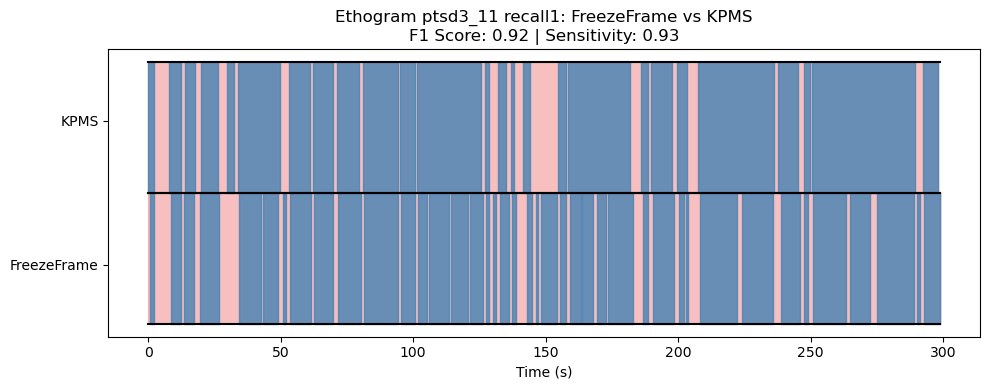

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd3_11, Day: recall1, F1 Score: 0.92, Sensitivity: 0.93


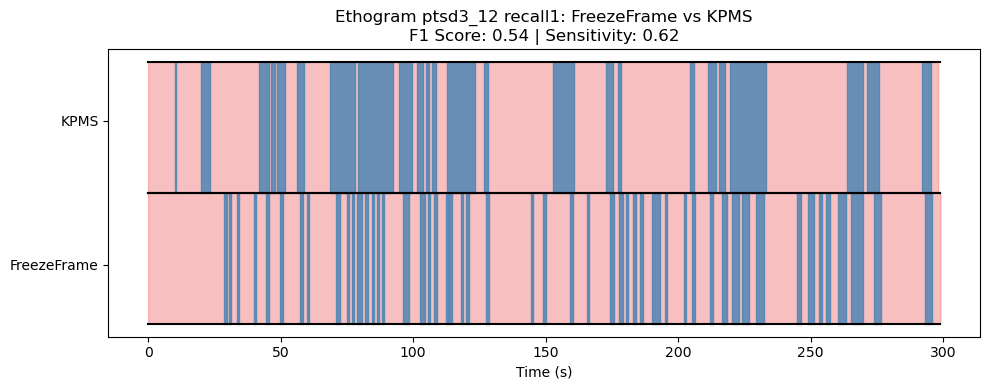

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd3_12, Day: recall1, F1 Score: 0.54, Sensitivity: 0.62


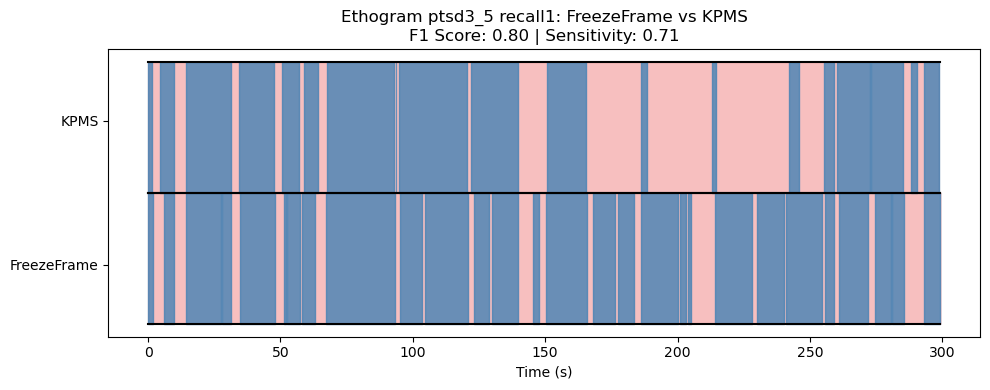

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd3_5, Day: recall1, F1 Score: 0.80, Sensitivity: 0.71


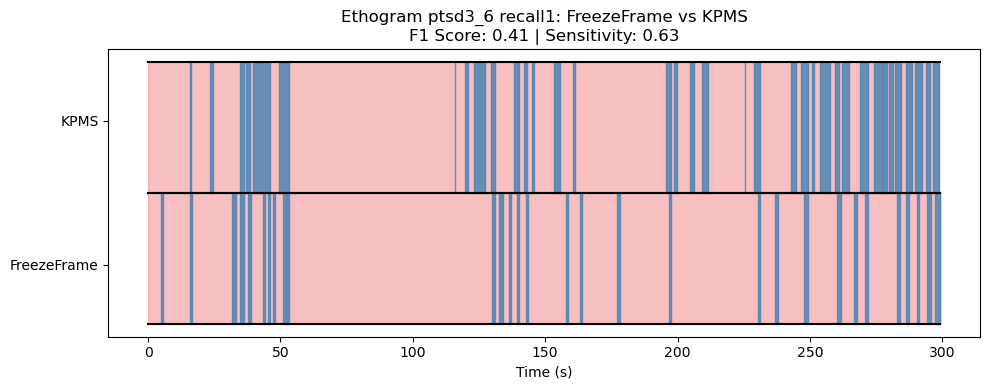

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd3_6, Day: recall1, F1 Score: 0.41, Sensitivity: 0.63


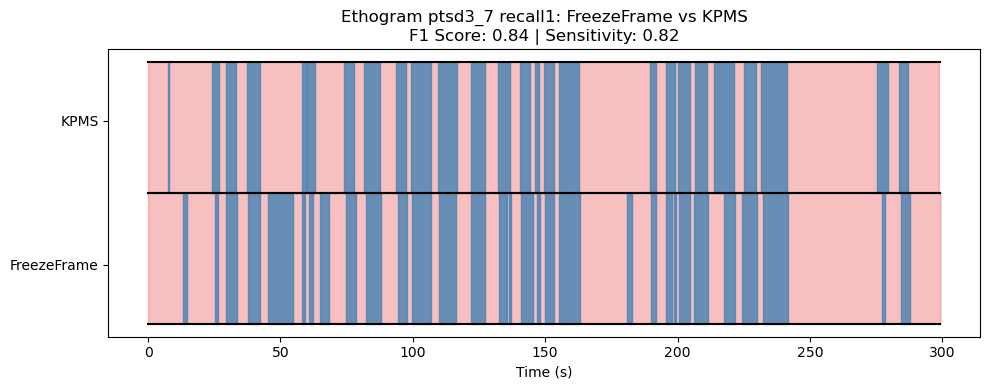

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd3_7, Day: recall1, F1 Score: 0.84, Sensitivity: 0.82


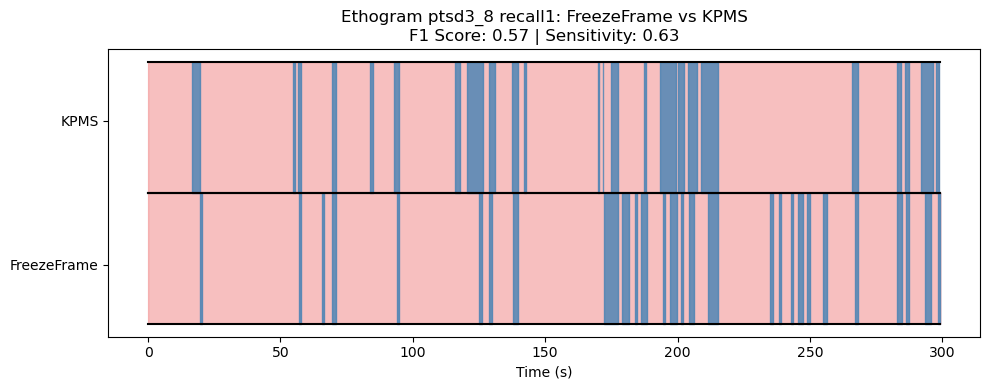

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd3_8, Day: recall1, F1 Score: 0.57, Sensitivity: 0.63


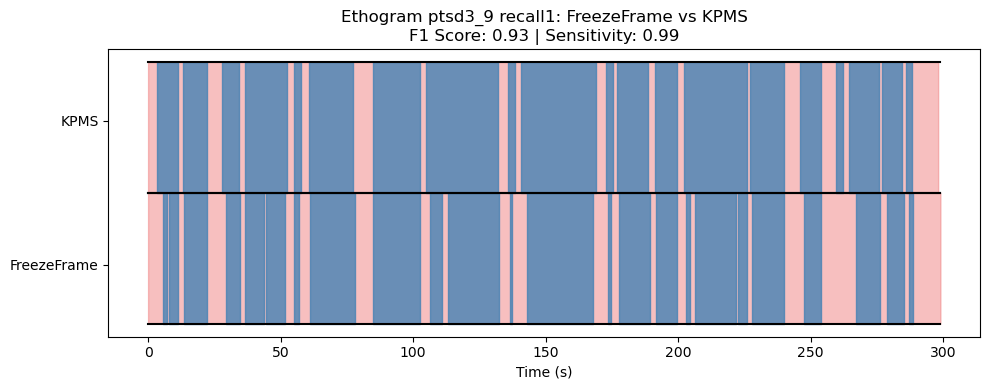

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd3_9, Day: recall1, F1 Score: 0.93, Sensitivity: 0.99


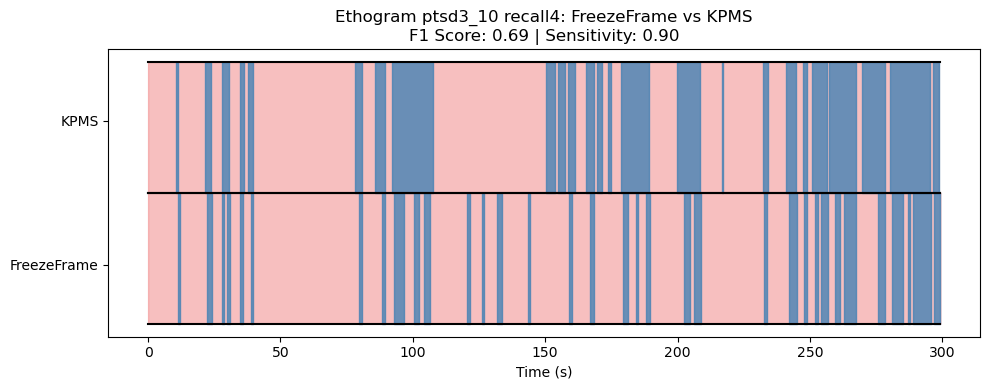

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd3_10, Day: recall4, F1 Score: 0.69, Sensitivity: 0.90


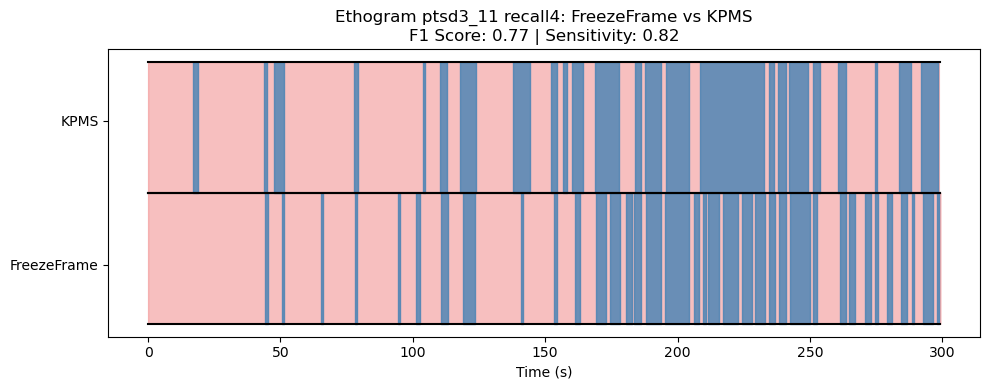

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd3_11, Day: recall4, F1 Score: 0.77, Sensitivity: 0.82


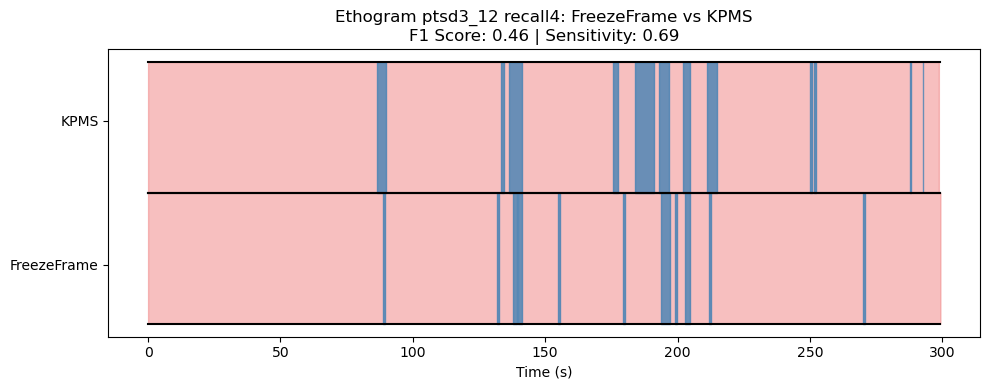

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd3_12, Day: recall4, F1 Score: 0.46, Sensitivity: 0.69


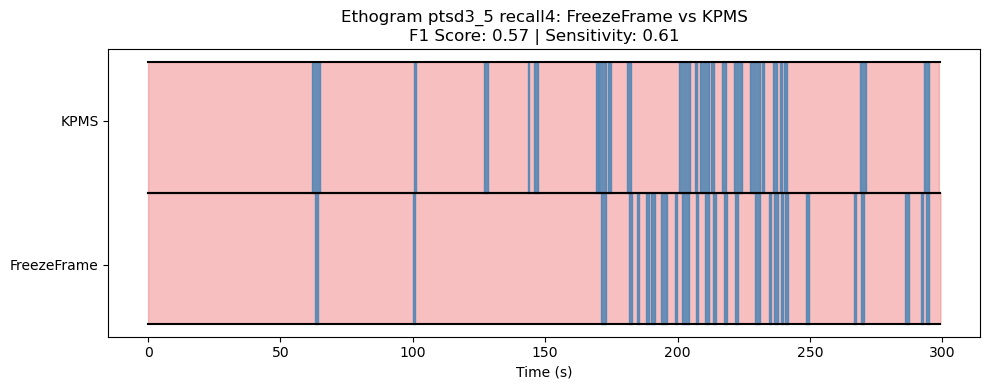

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd3_5, Day: recall4, F1 Score: 0.57, Sensitivity: 0.61


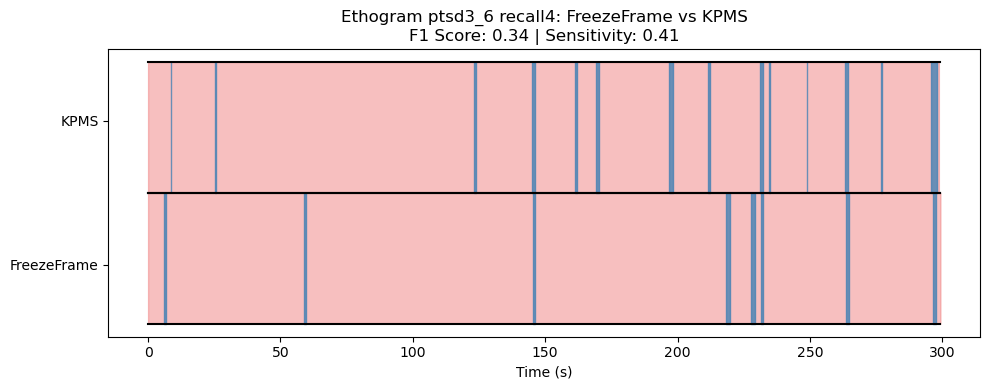

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd3_6, Day: recall4, F1 Score: 0.34, Sensitivity: 0.41


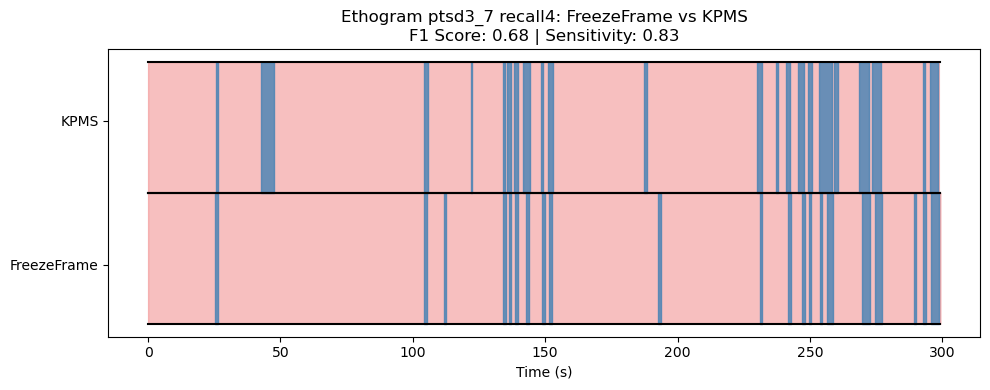

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd3_7, Day: recall4, F1 Score: 0.68, Sensitivity: 0.83


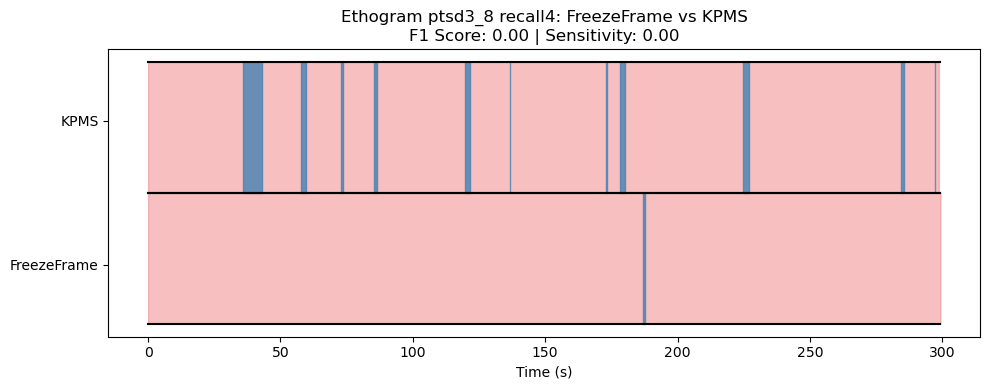

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd3_8, Day: recall4, F1 Score: 0.00, Sensitivity: 0.00


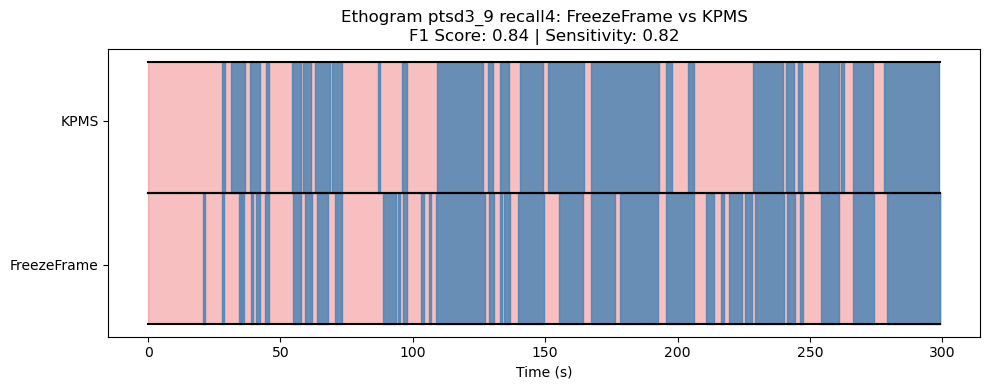

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd3_9, Day: recall4, F1 Score: 0.84, Sensitivity: 0.82


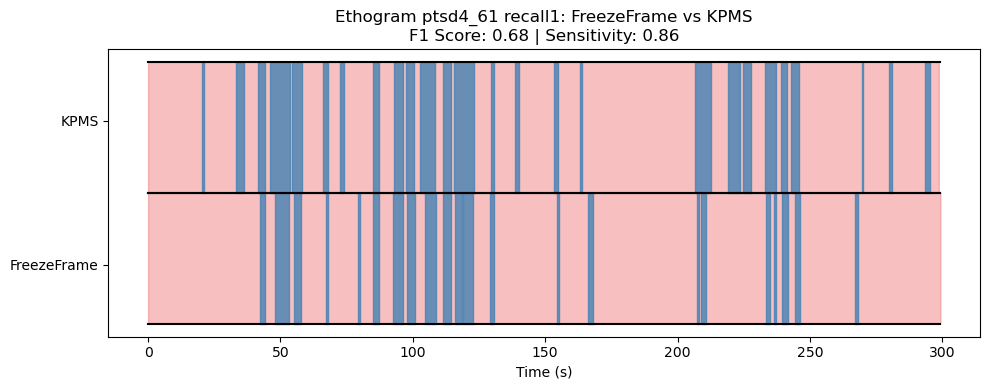

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd4_61, Day: recall1, F1 Score: 0.68, Sensitivity: 0.86


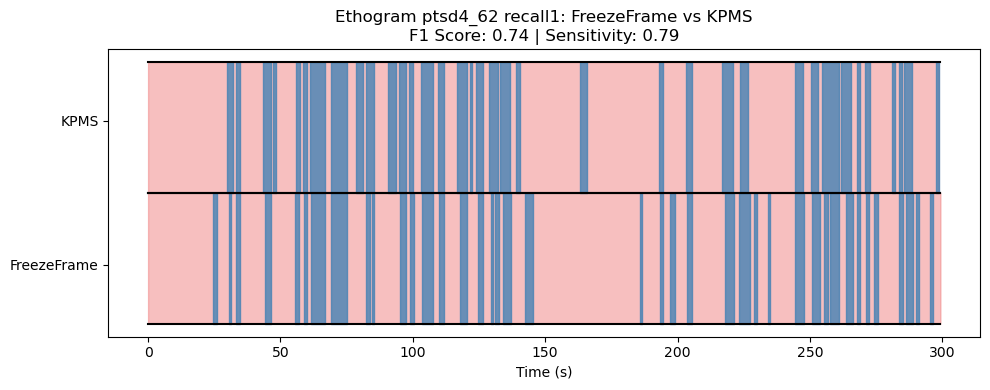

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd4_62, Day: recall1, F1 Score: 0.74, Sensitivity: 0.79


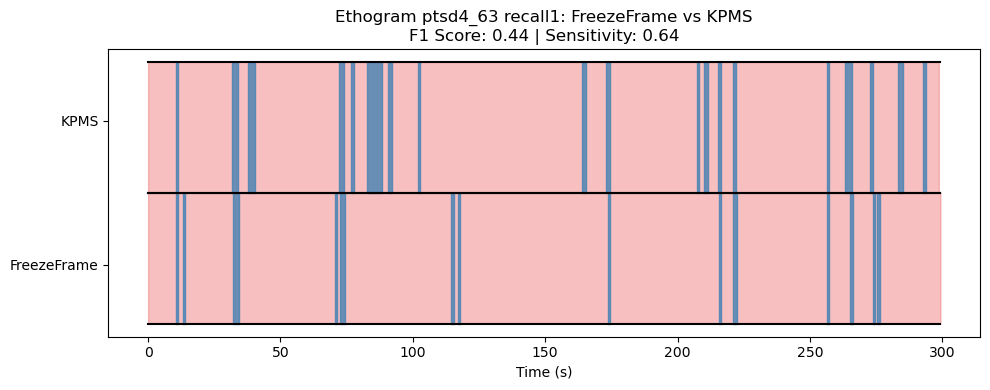

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd4_63, Day: recall1, F1 Score: 0.44, Sensitivity: 0.64


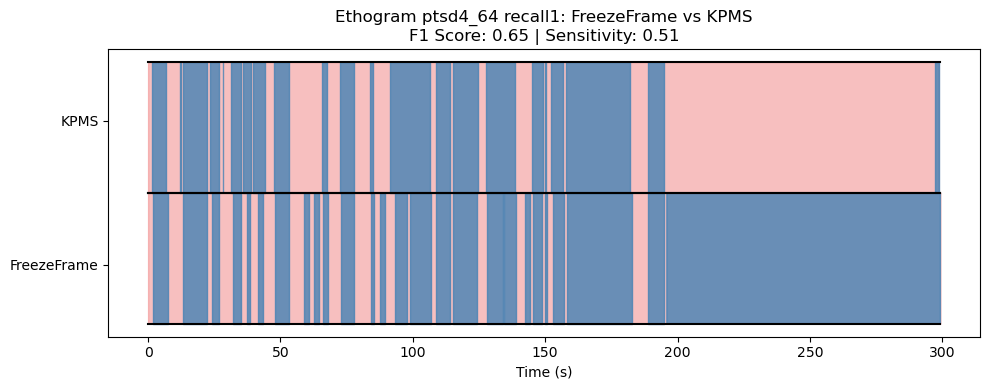

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd4_64, Day: recall1, F1 Score: 0.65, Sensitivity: 0.51


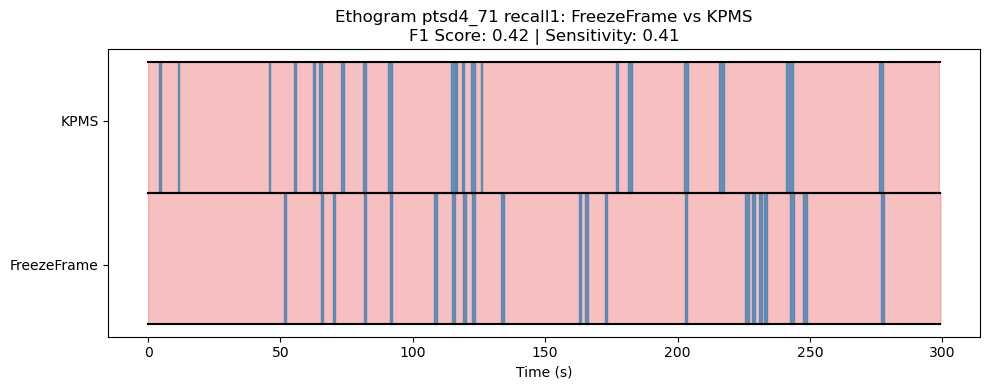

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd4_71, Day: recall1, F1 Score: 0.42, Sensitivity: 0.41


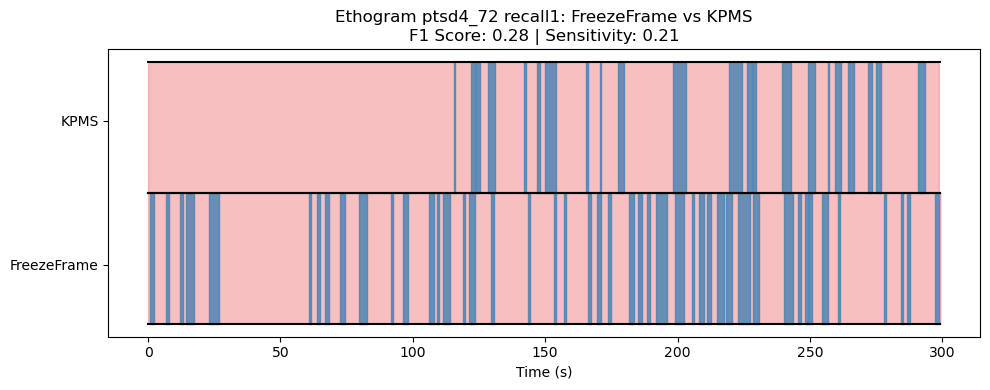

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd4_72, Day: recall1, F1 Score: 0.28, Sensitivity: 0.21


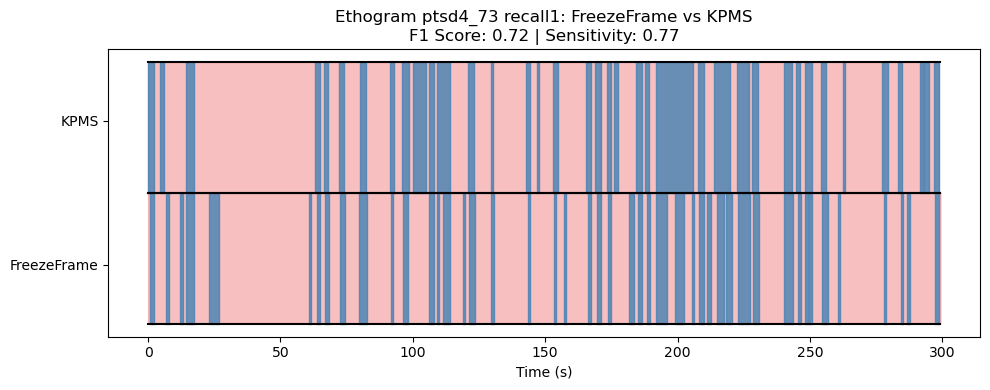

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd4_73, Day: recall1, F1 Score: 0.72, Sensitivity: 0.77


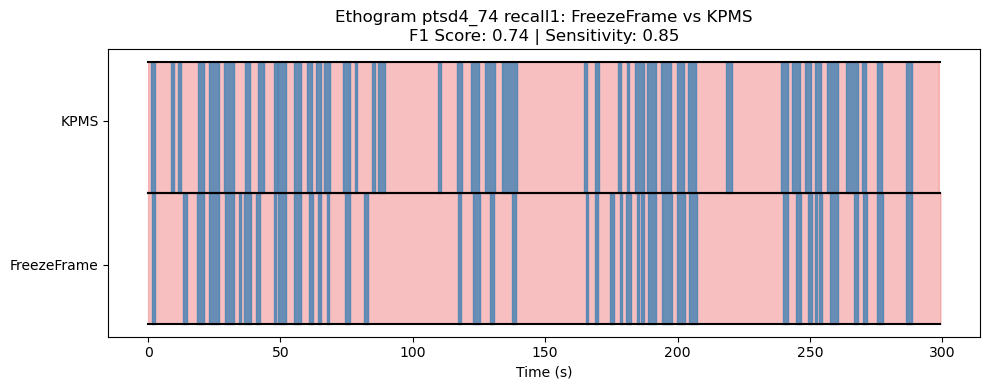

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd4_74, Day: recall1, F1 Score: 0.74, Sensitivity: 0.85


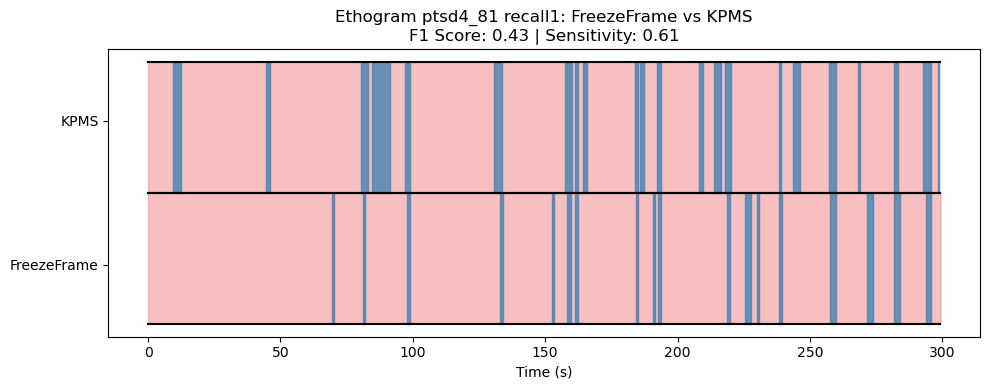

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd4_81, Day: recall1, F1 Score: 0.43, Sensitivity: 0.61


c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



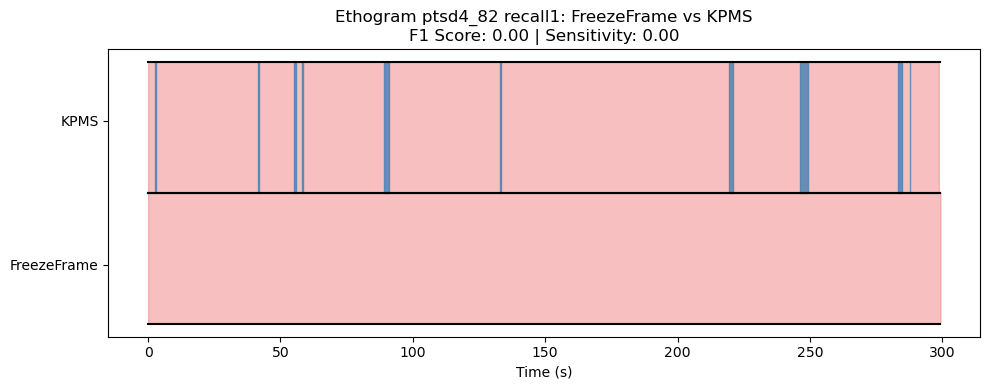

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd4_82, Day: recall1, F1 Score: 0.00, Sensitivity: 0.00


c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



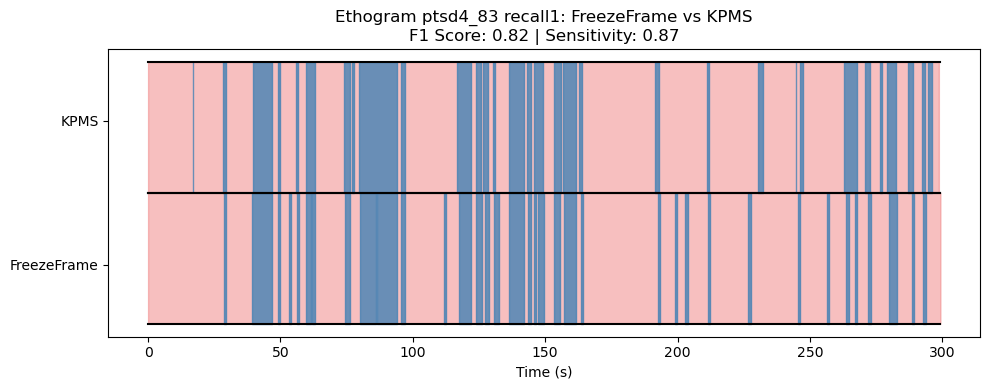

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd4_83, Day: recall1, F1 Score: 0.82, Sensitivity: 0.87


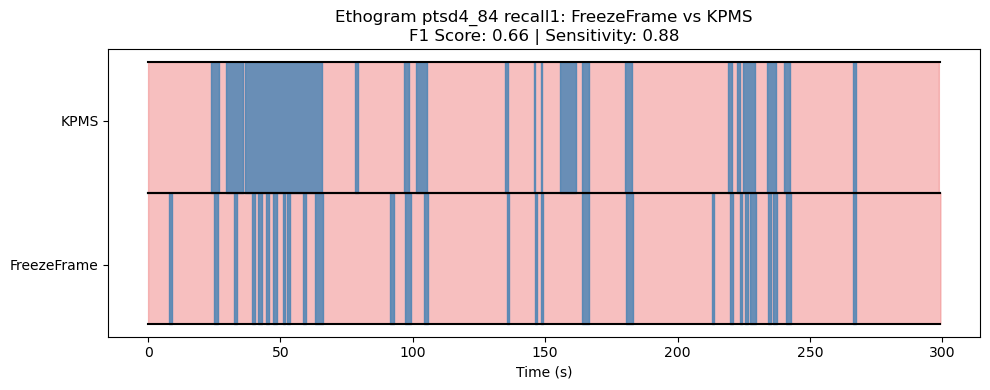

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd4_84, Day: recall1, F1 Score: 0.66, Sensitivity: 0.88


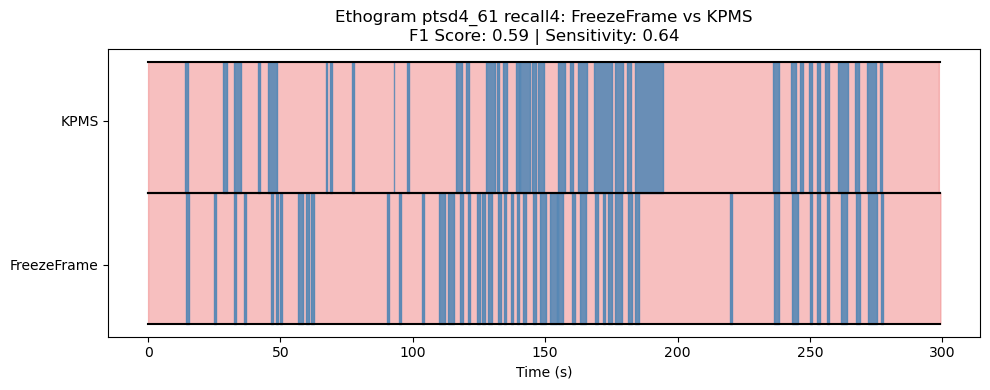

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd4_61, Day: recall4, F1 Score: 0.59, Sensitivity: 0.64


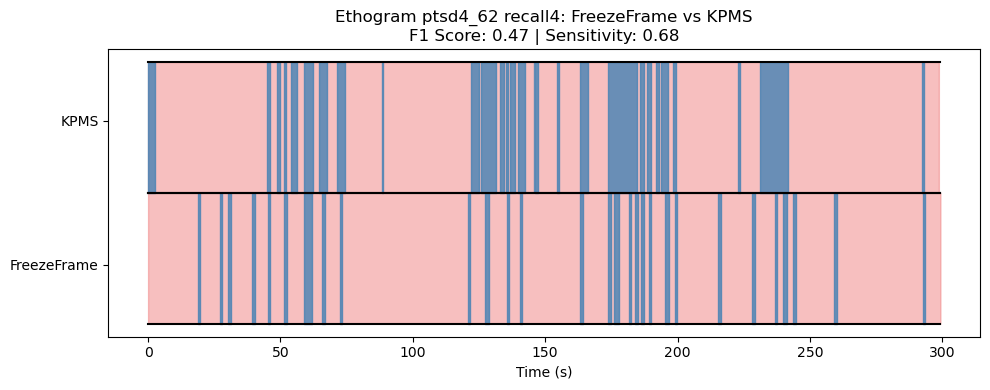

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd4_62, Day: recall4, F1 Score: 0.47, Sensitivity: 0.68


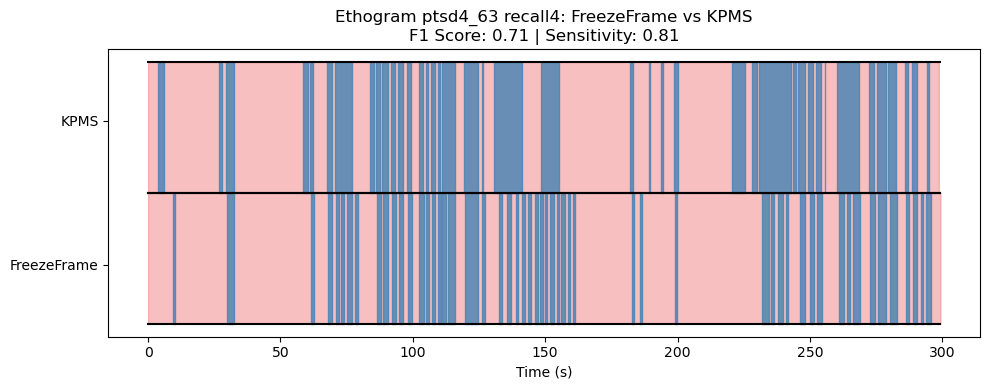

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd4_63, Day: recall4, F1 Score: 0.71, Sensitivity: 0.81


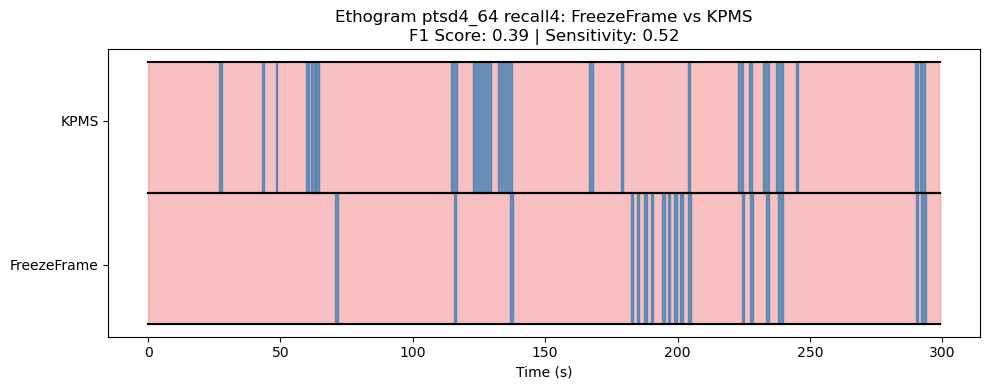

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd4_64, Day: recall4, F1 Score: 0.39, Sensitivity: 0.52


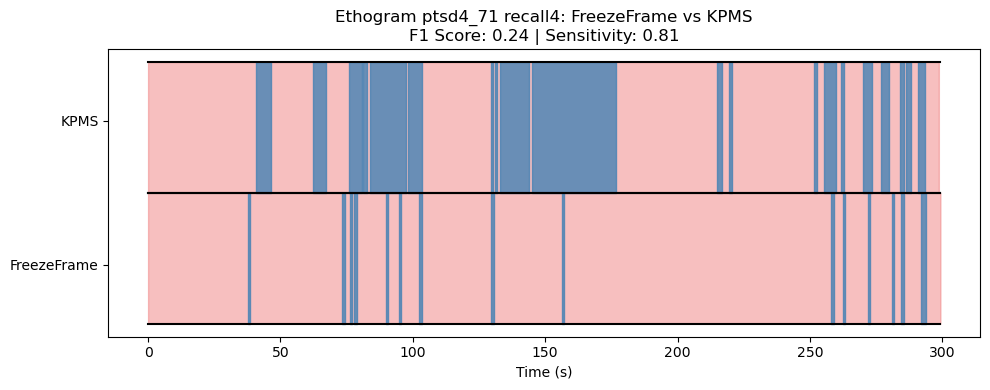

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd4_71, Day: recall4, F1 Score: 0.24, Sensitivity: 0.81


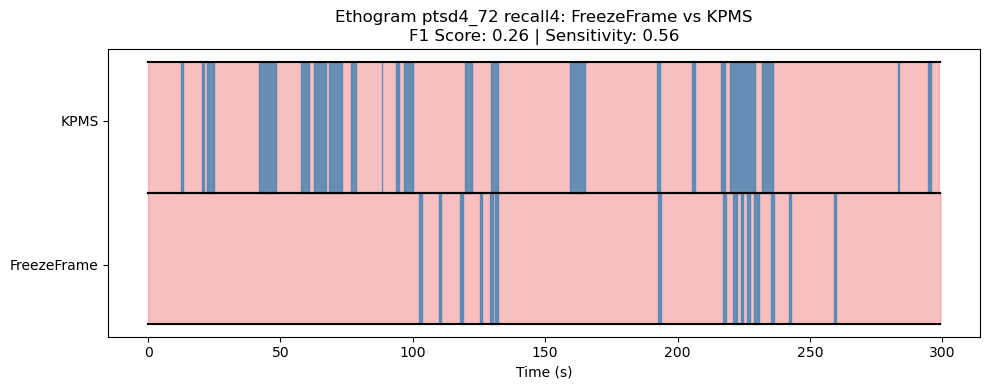

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd4_72, Day: recall4, F1 Score: 0.26, Sensitivity: 0.56


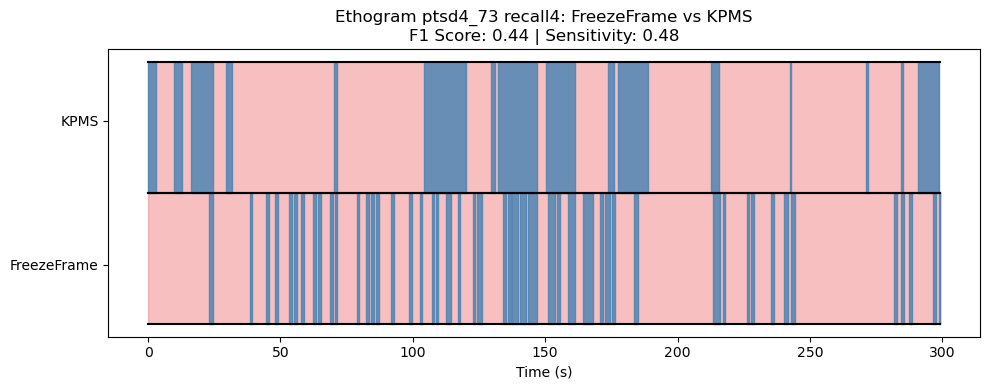

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd4_73, Day: recall4, F1 Score: 0.44, Sensitivity: 0.48


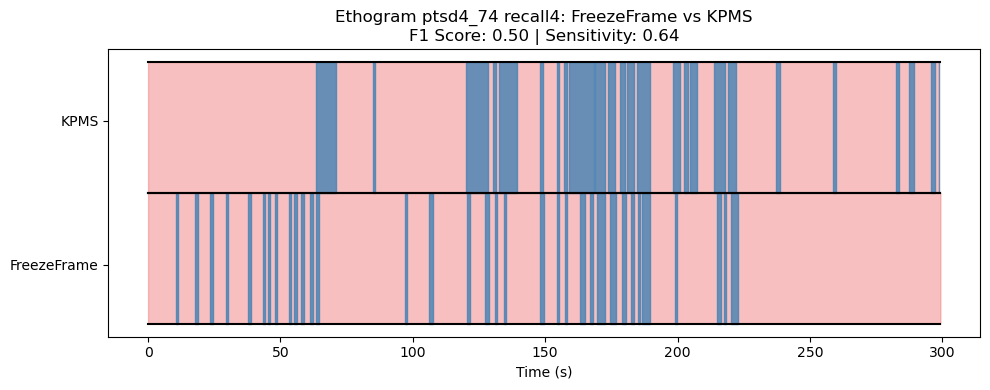

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd4_74, Day: recall4, F1 Score: 0.50, Sensitivity: 0.64


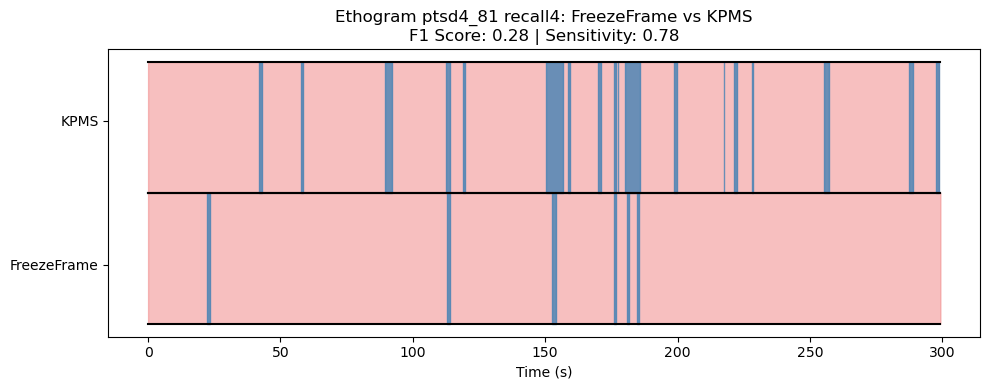

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd4_81, Day: recall4, F1 Score: 0.28, Sensitivity: 0.78


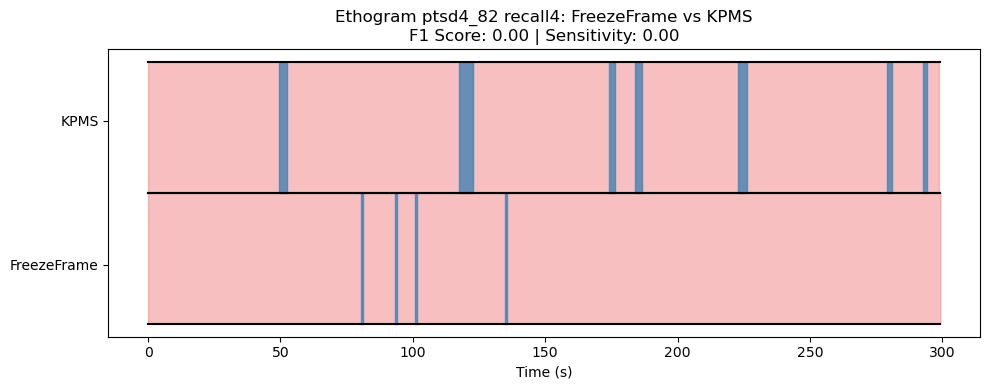

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd4_82, Day: recall4, F1 Score: 0.00, Sensitivity: 0.00


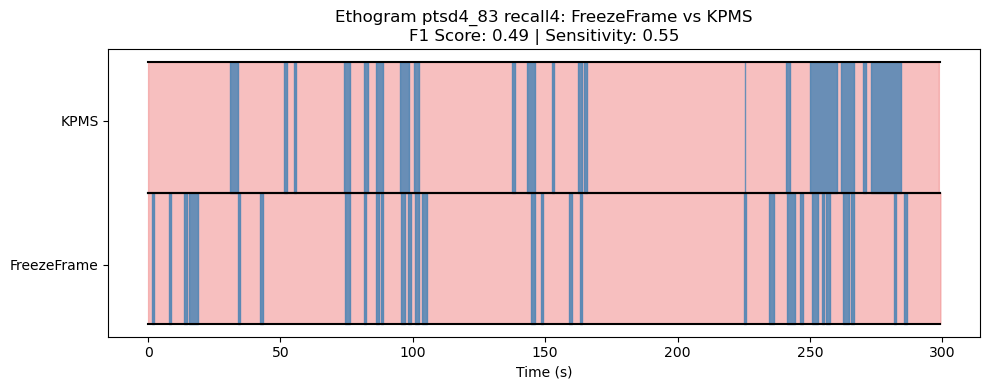

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd4_83, Day: recall4, F1 Score: 0.49, Sensitivity: 0.55


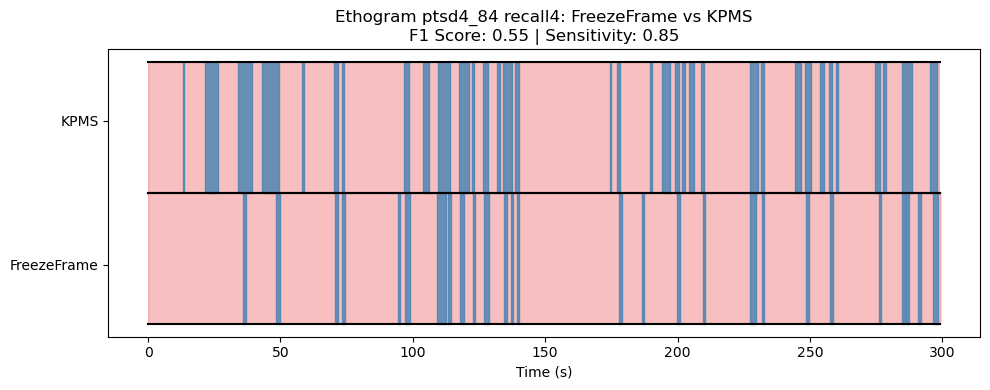

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd4_84, Day: recall4, F1 Score: 0.55, Sensitivity: 0.85


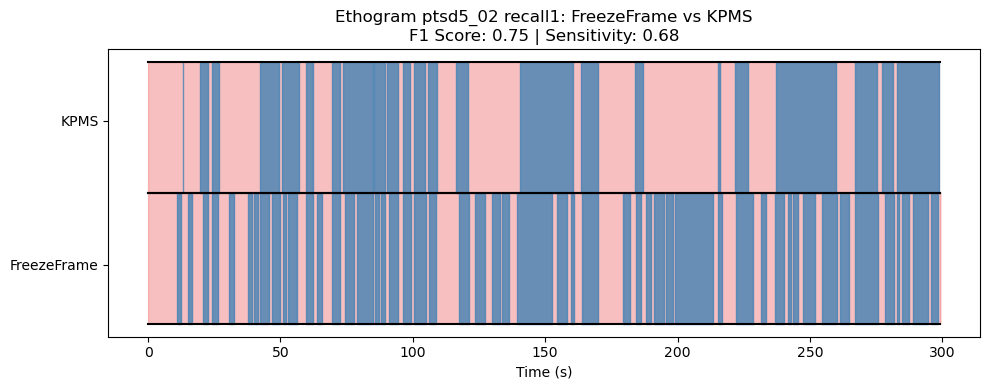

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd5_02, Day: recall1, F1 Score: 0.75, Sensitivity: 0.68


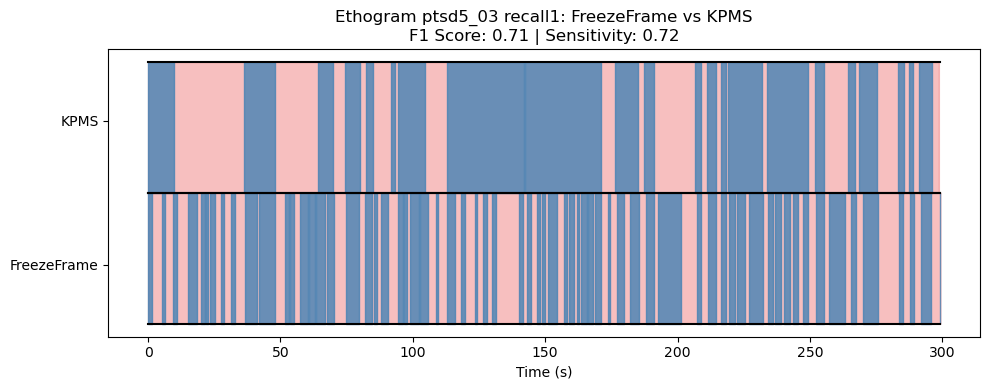

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd5_03, Day: recall1, F1 Score: 0.71, Sensitivity: 0.72


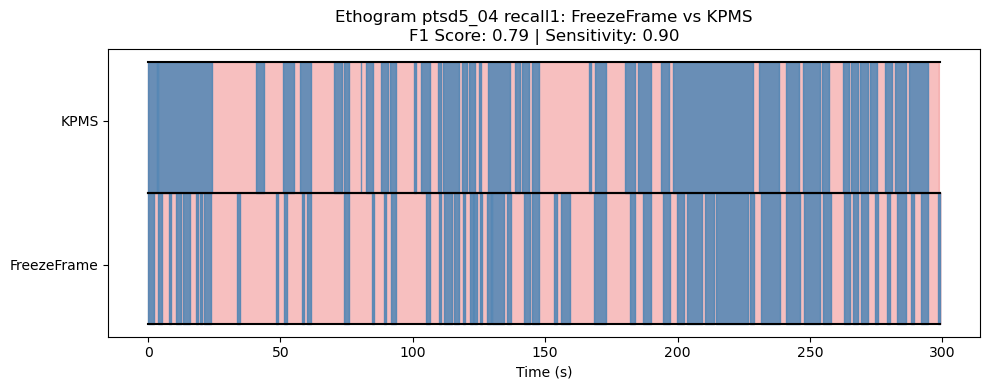

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd5_04, Day: recall1, F1 Score: 0.79, Sensitivity: 0.90


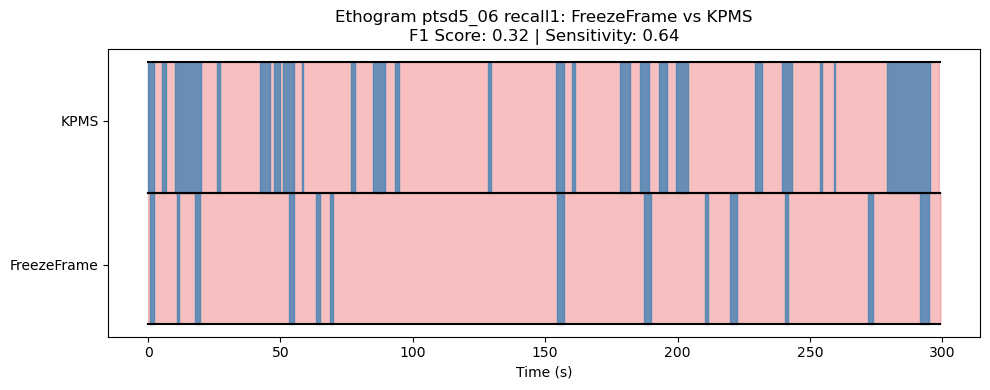

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd5_06, Day: recall1, F1 Score: 0.32, Sensitivity: 0.64


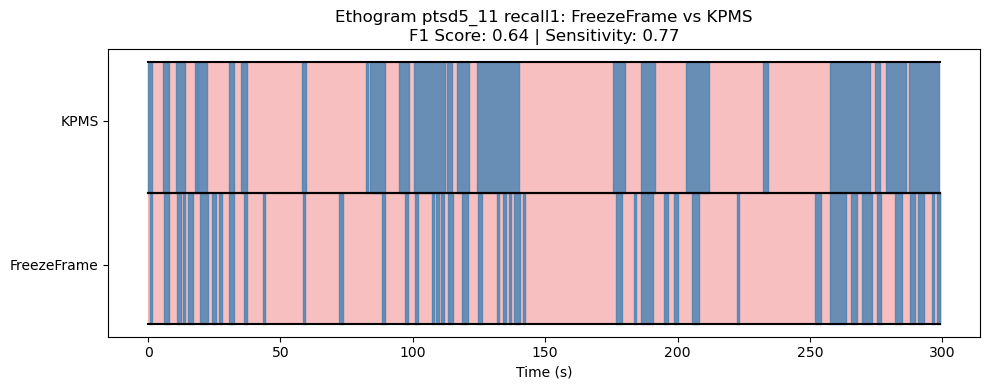

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd5_11, Day: recall1, F1 Score: 0.64, Sensitivity: 0.77


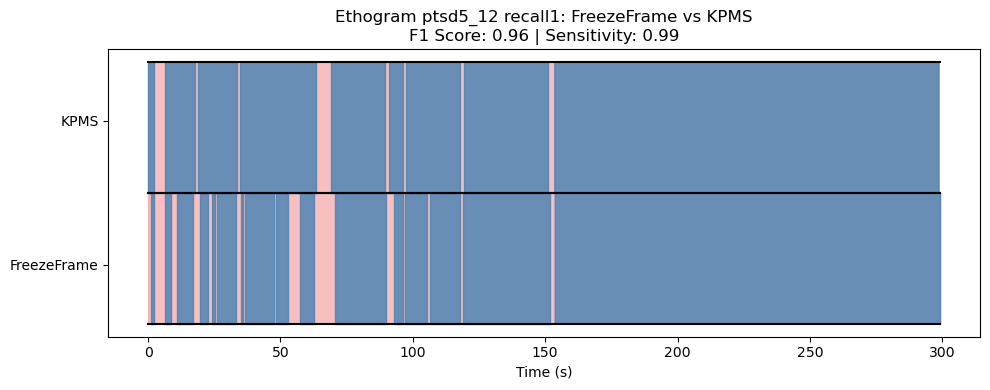

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd5_12, Day: recall1, F1 Score: 0.96, Sensitivity: 0.99


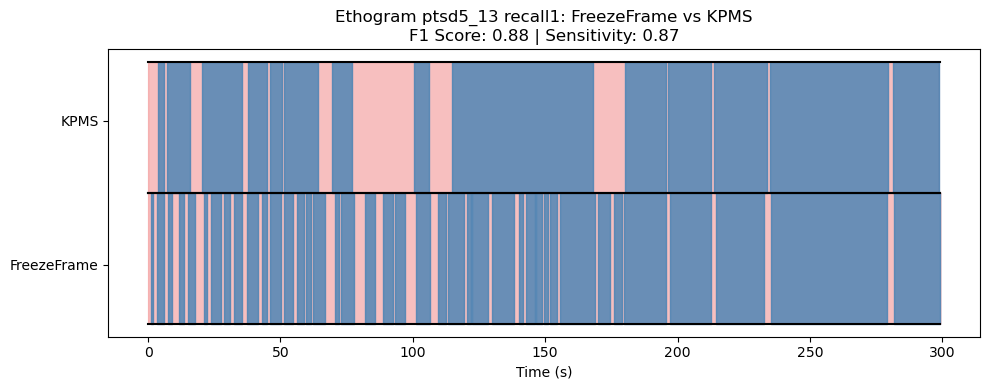

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd5_13, Day: recall1, F1 Score: 0.88, Sensitivity: 0.87


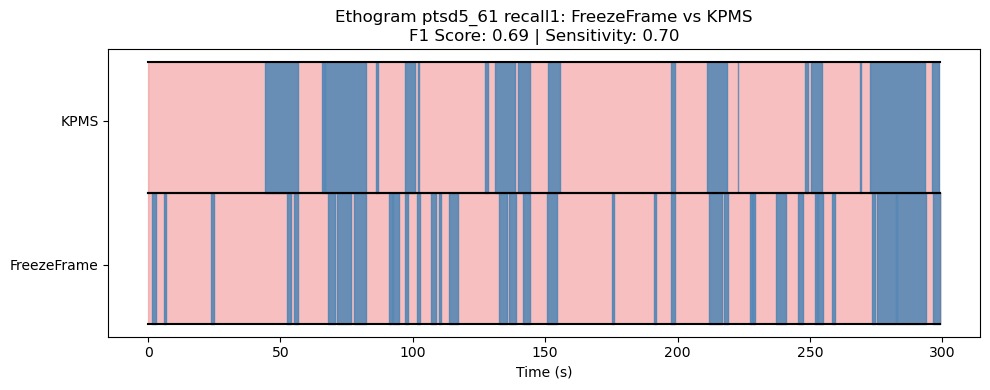

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd5_61, Day: recall1, F1 Score: 0.69, Sensitivity: 0.70


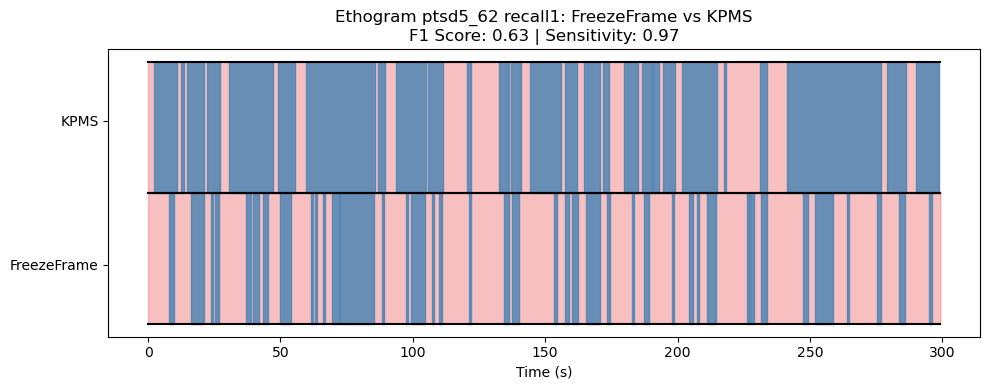

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd5_62, Day: recall1, F1 Score: 0.63, Sensitivity: 0.97


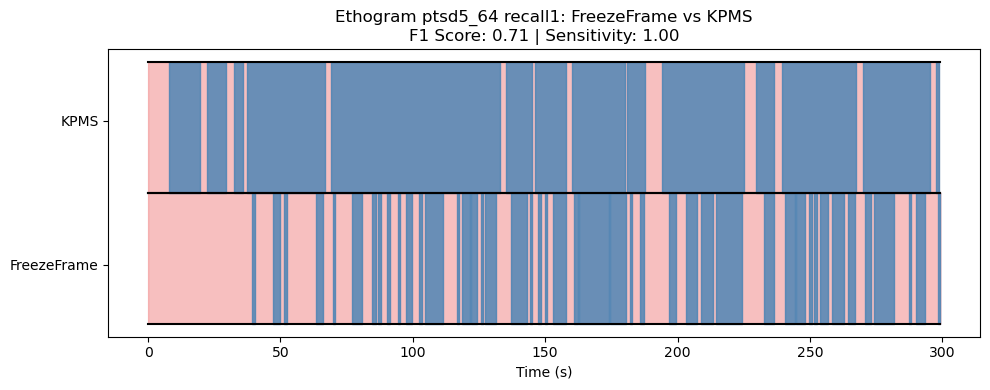

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd5_64, Day: recall1, F1 Score: 0.71, Sensitivity: 1.00


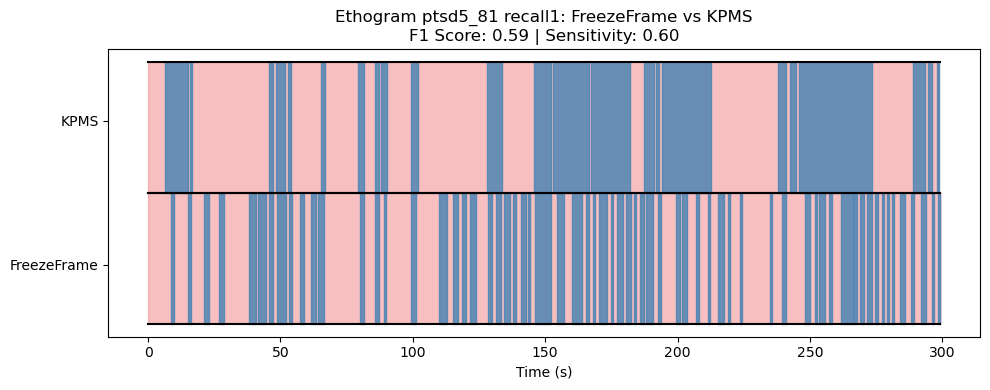

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd5_81, Day: recall1, F1 Score: 0.59, Sensitivity: 0.60


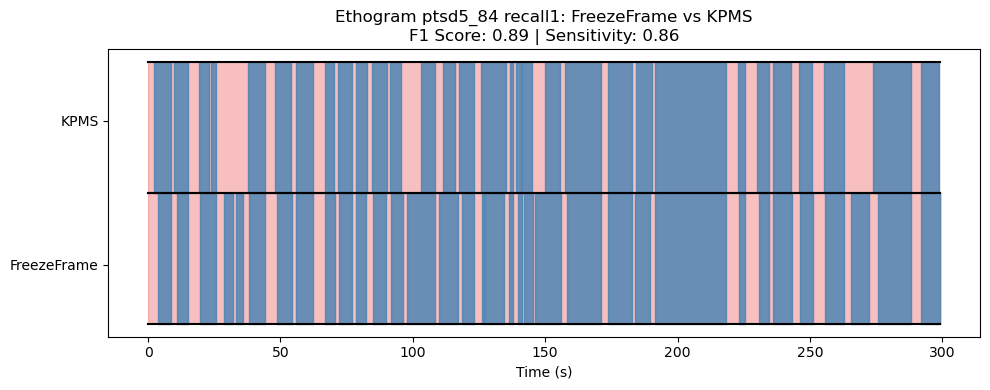

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd5_84, Day: recall1, F1 Score: 0.89, Sensitivity: 0.86


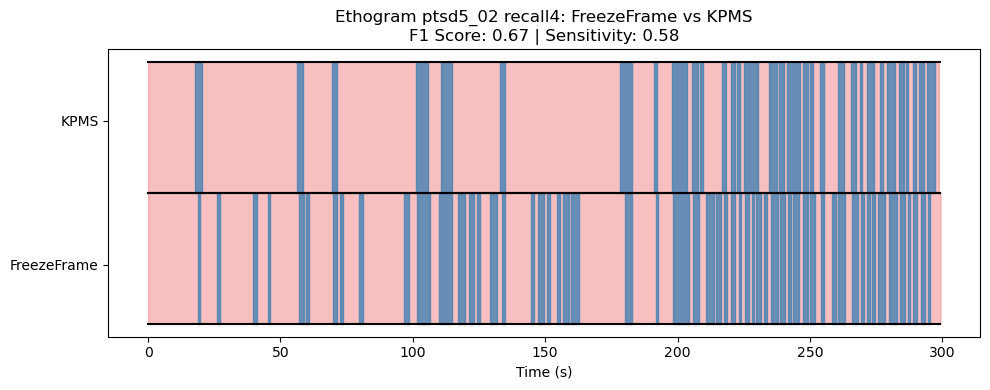

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd5_02, Day: recall4, F1 Score: 0.67, Sensitivity: 0.58


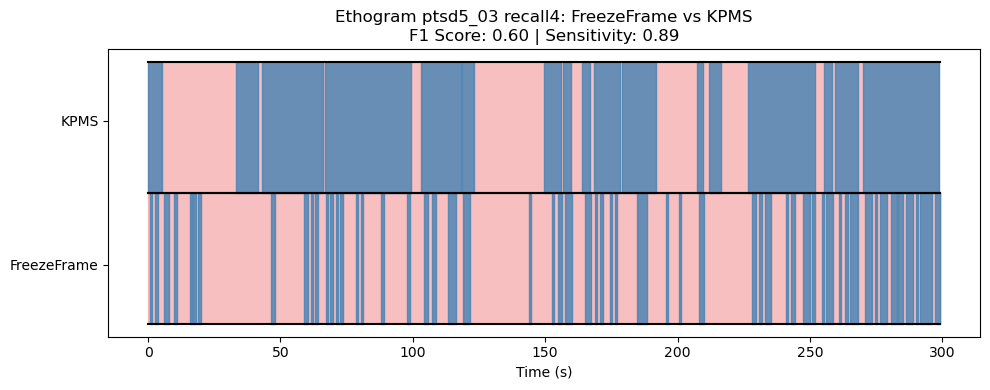

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd5_03, Day: recall4, F1 Score: 0.60, Sensitivity: 0.89


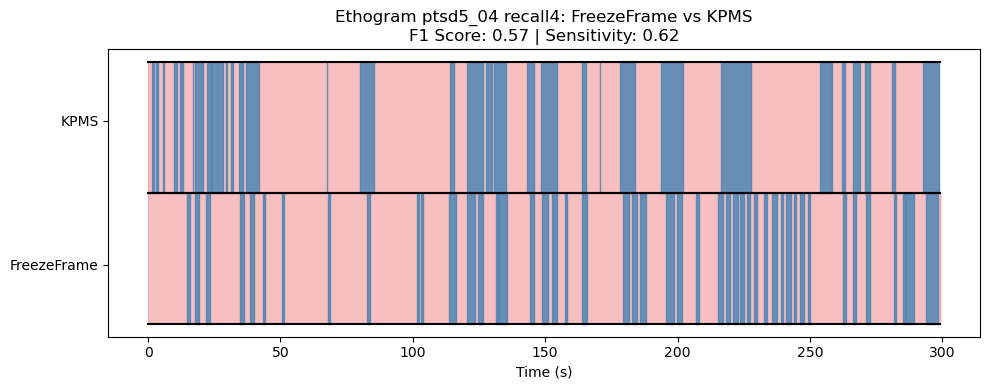

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd5_04, Day: recall4, F1 Score: 0.57, Sensitivity: 0.62


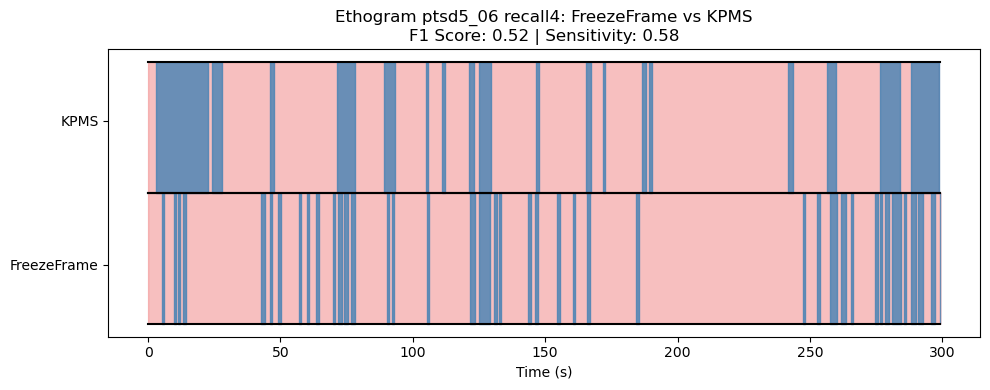

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd5_06, Day: recall4, F1 Score: 0.52, Sensitivity: 0.58


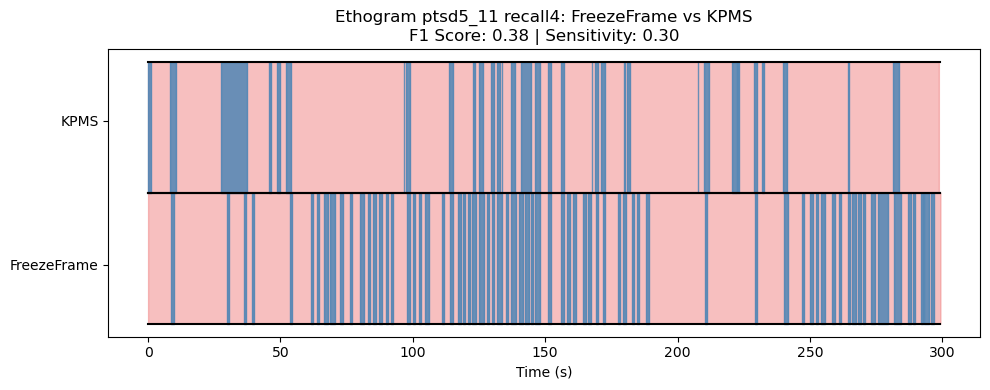

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd5_11, Day: recall4, F1 Score: 0.38, Sensitivity: 0.30


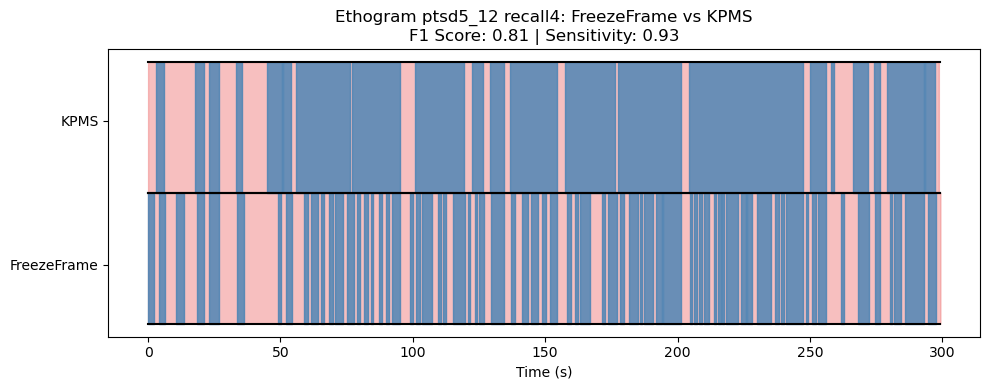

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd5_12, Day: recall4, F1 Score: 0.81, Sensitivity: 0.93


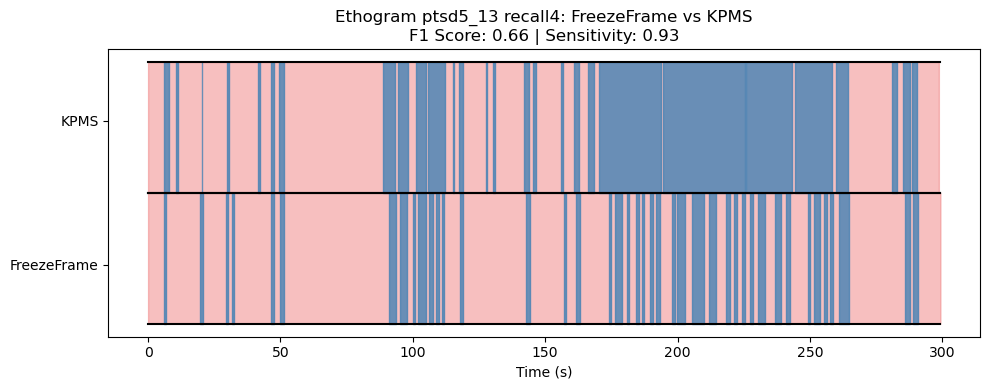

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd5_13, Day: recall4, F1 Score: 0.66, Sensitivity: 0.93


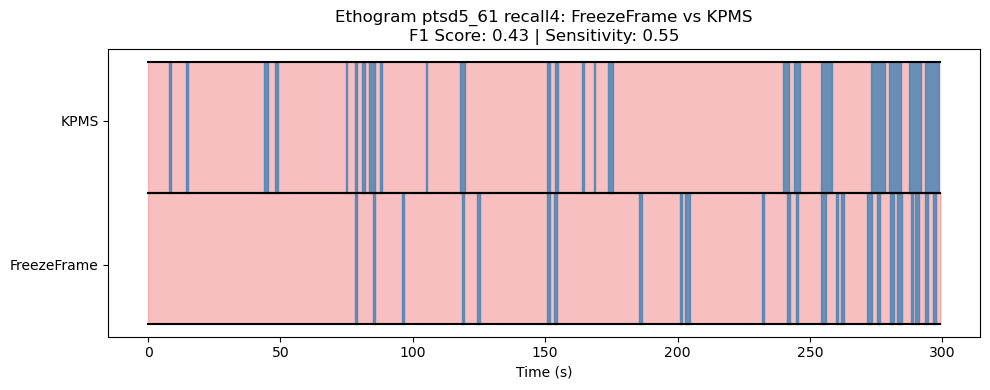

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd5_61, Day: recall4, F1 Score: 0.43, Sensitivity: 0.55


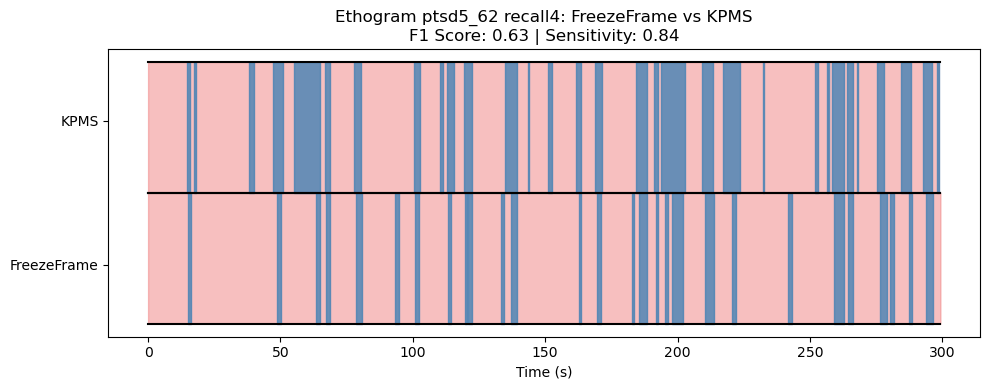

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd5_62, Day: recall4, F1 Score: 0.63, Sensitivity: 0.84


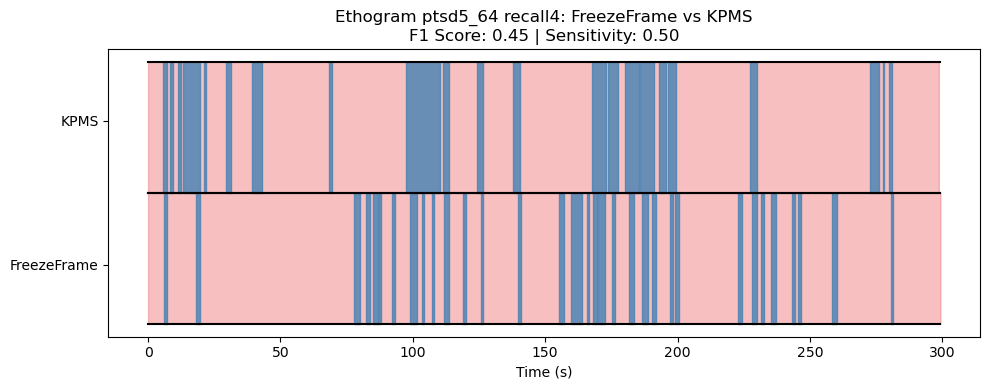

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd5_64, Day: recall4, F1 Score: 0.45, Sensitivity: 0.50


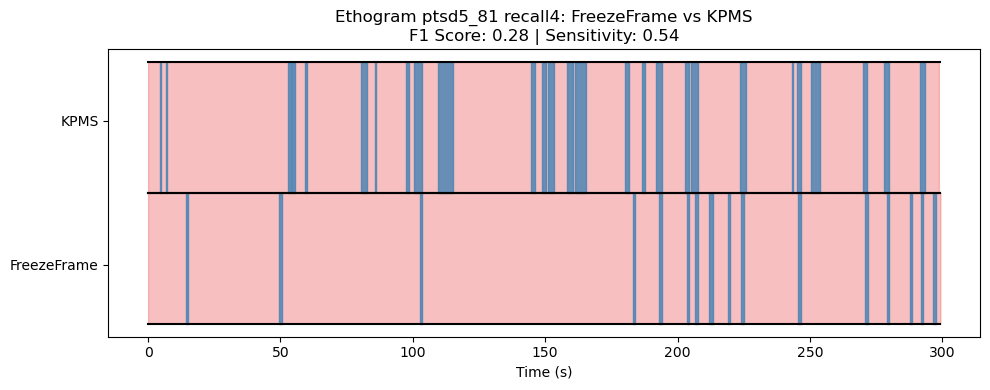

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd5_81, Day: recall4, F1 Score: 0.28, Sensitivity: 0.54
Skipping plot for Cohort ID: ptsd5_83, Day: recall4 due to empty data.


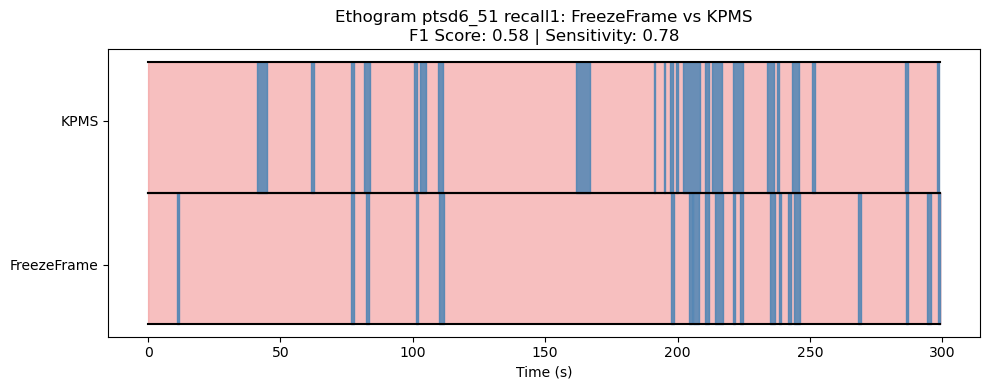

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd6_51, Day: recall1, F1 Score: 0.58, Sensitivity: 0.78


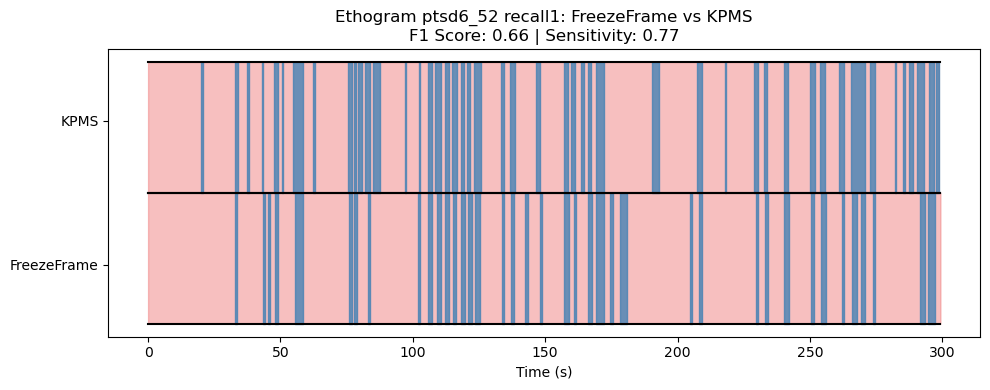

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd6_52, Day: recall1, F1 Score: 0.66, Sensitivity: 0.77


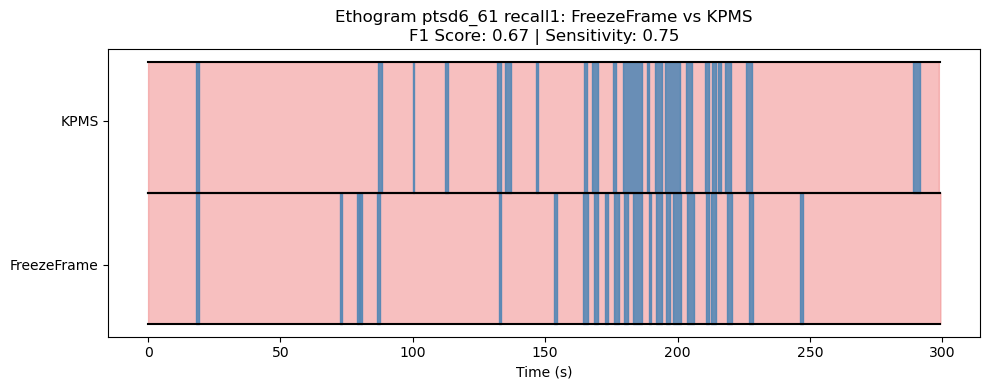

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd6_61, Day: recall1, F1 Score: 0.67, Sensitivity: 0.75


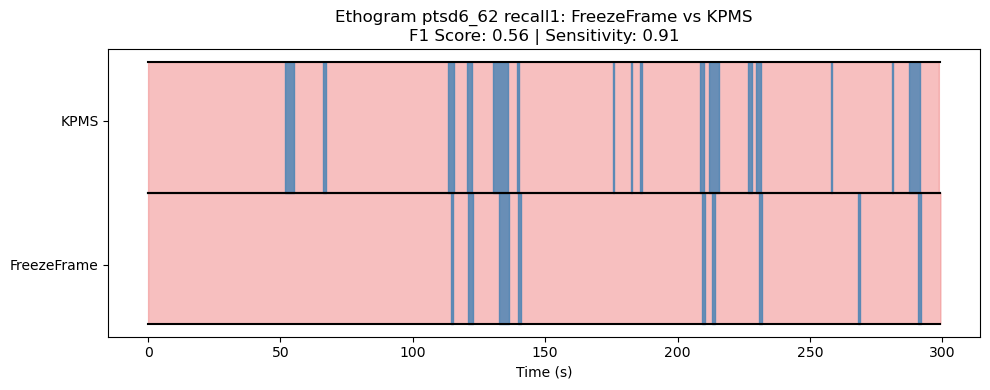

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd6_62, Day: recall1, F1 Score: 0.56, Sensitivity: 0.91


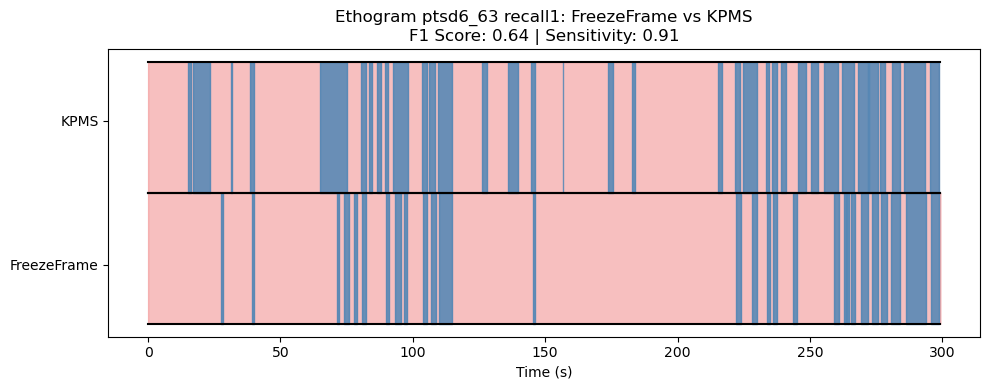

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd6_63, Day: recall1, F1 Score: 0.64, Sensitivity: 0.91


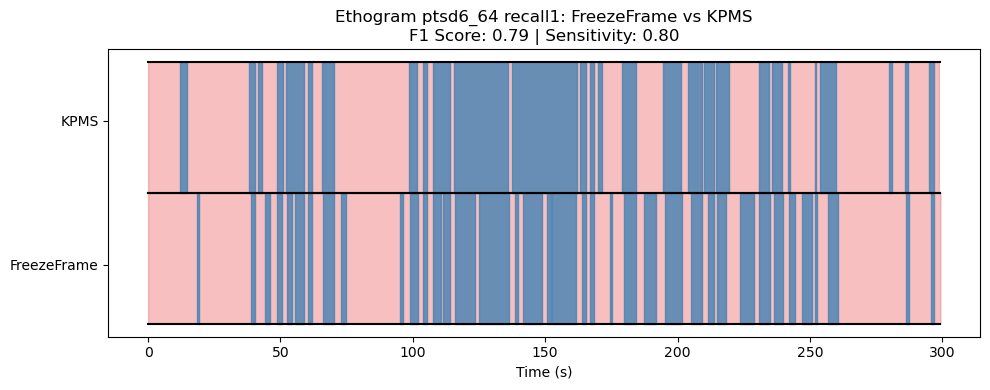

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd6_64, Day: recall1, F1 Score: 0.79, Sensitivity: 0.80


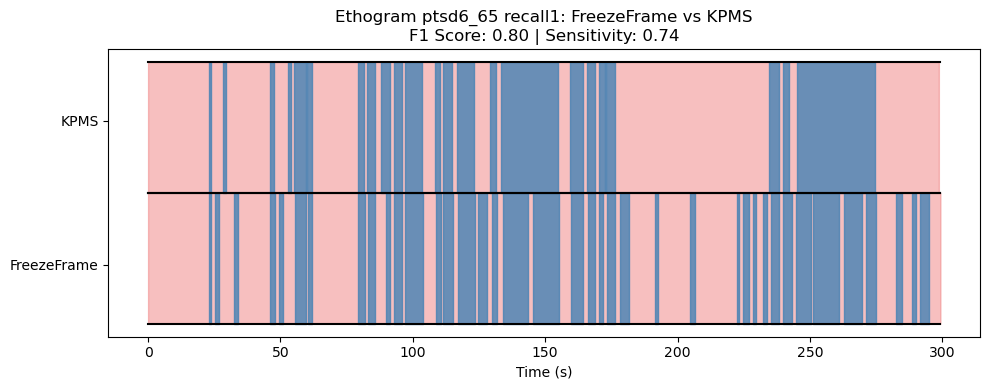

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd6_65, Day: recall1, F1 Score: 0.80, Sensitivity: 0.74


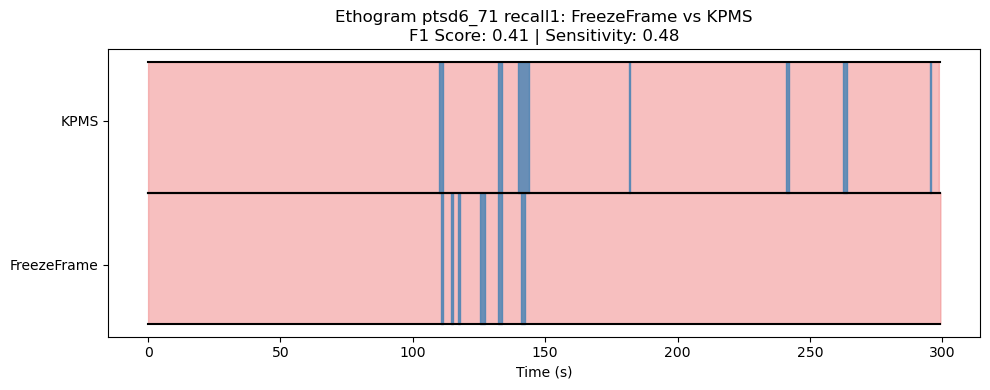

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd6_71, Day: recall1, F1 Score: 0.41, Sensitivity: 0.48


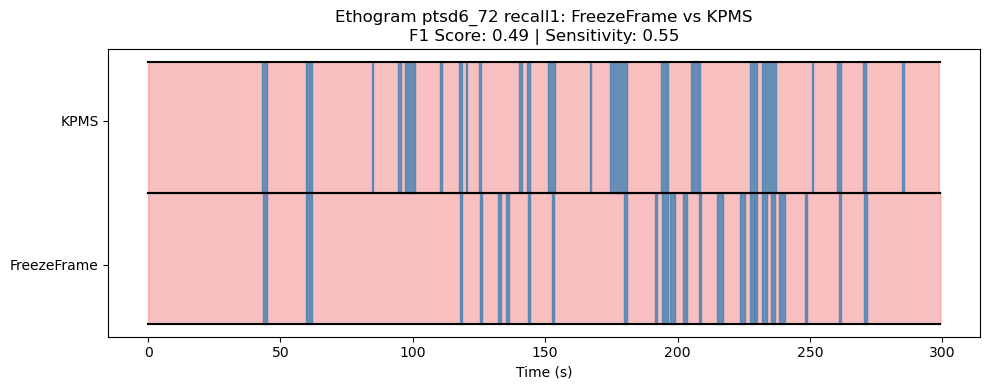

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd6_72, Day: recall1, F1 Score: 0.49, Sensitivity: 0.55


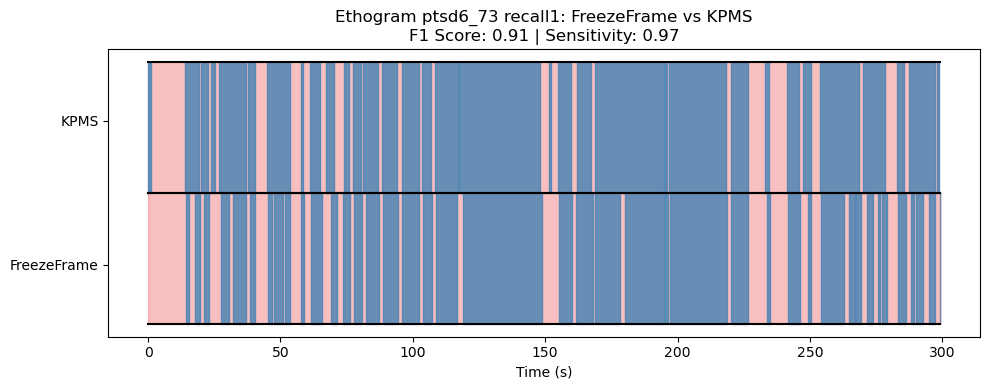

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd6_73, Day: recall1, F1 Score: 0.91, Sensitivity: 0.97


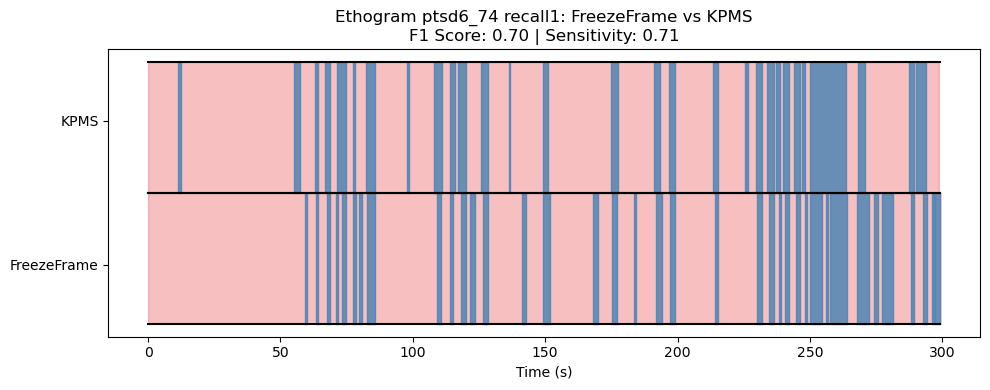

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd6_74, Day: recall1, F1 Score: 0.70, Sensitivity: 0.71


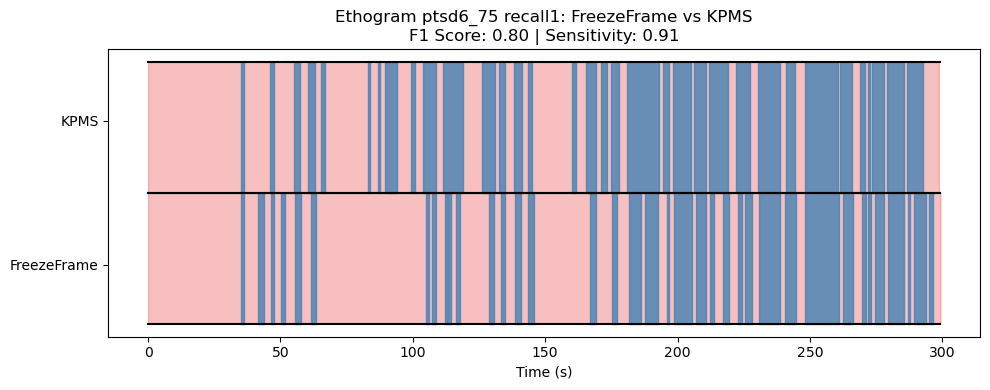

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd6_75, Day: recall1, F1 Score: 0.80, Sensitivity: 0.91


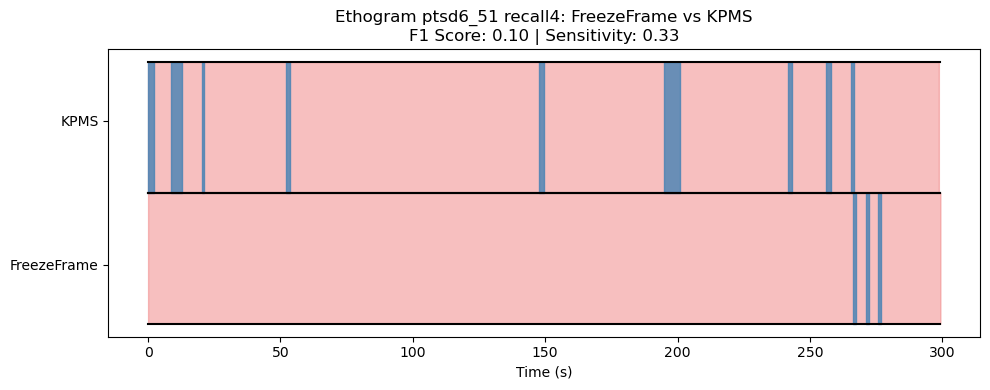

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd6_51, Day: recall4, F1 Score: 0.10, Sensitivity: 0.33


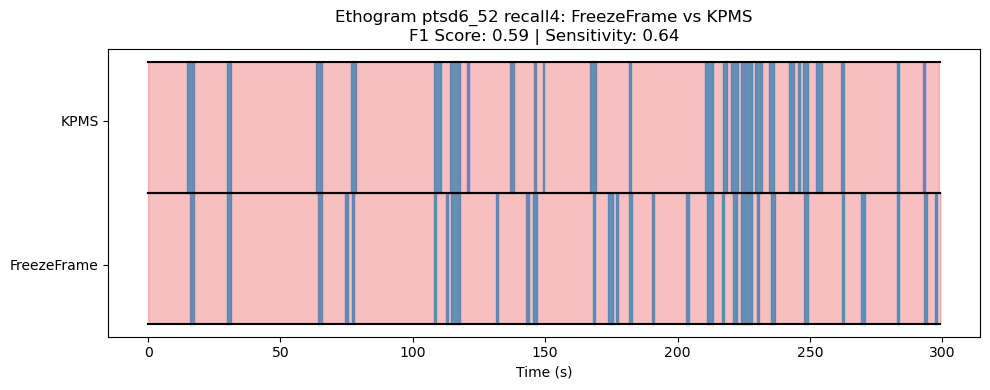

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd6_52, Day: recall4, F1 Score: 0.59, Sensitivity: 0.64


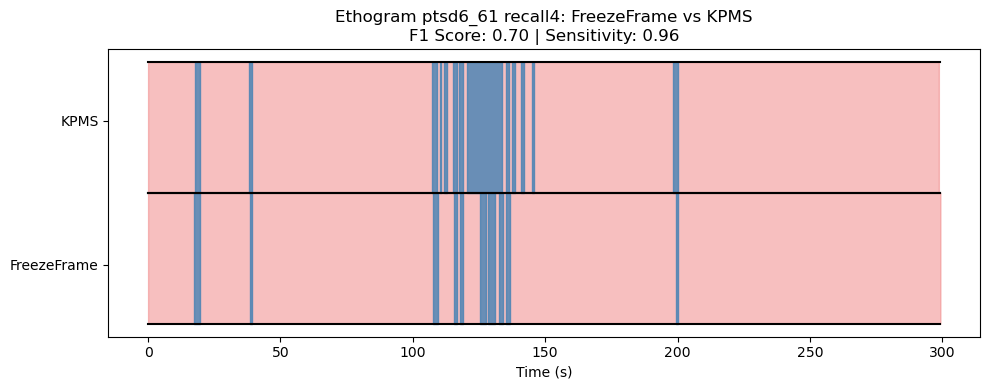

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd6_61, Day: recall4, F1 Score: 0.70, Sensitivity: 0.96


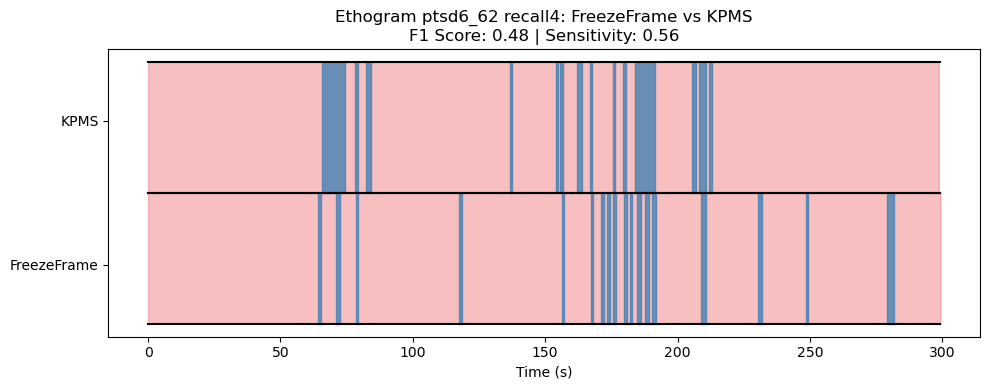

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd6_62, Day: recall4, F1 Score: 0.48, Sensitivity: 0.56


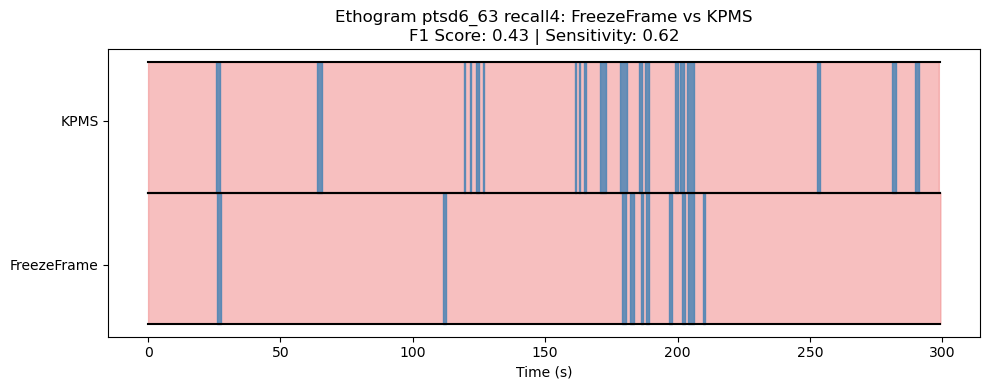

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd6_63, Day: recall4, F1 Score: 0.43, Sensitivity: 0.62


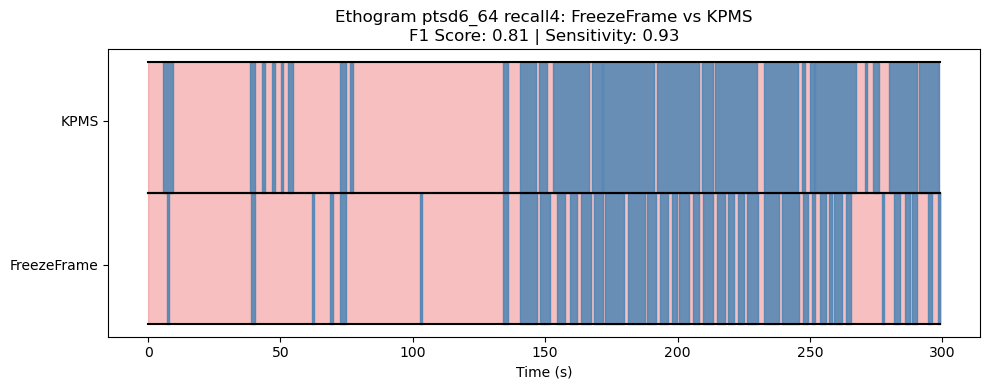

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd6_64, Day: recall4, F1 Score: 0.81, Sensitivity: 0.93


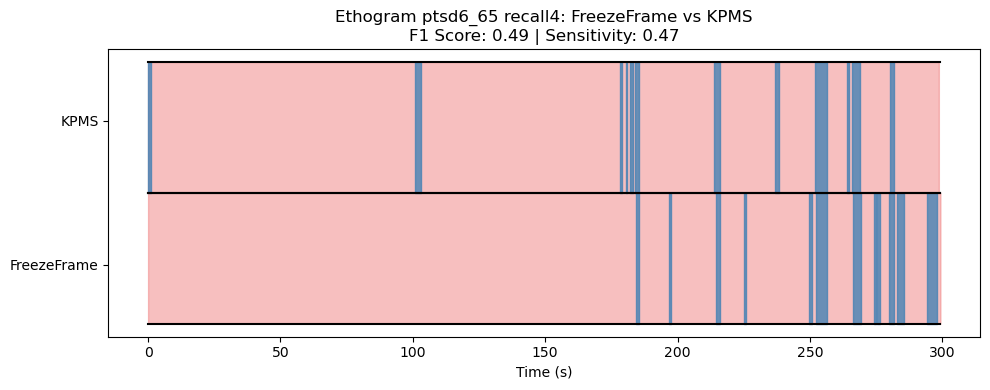

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd6_65, Day: recall4, F1 Score: 0.49, Sensitivity: 0.47


c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



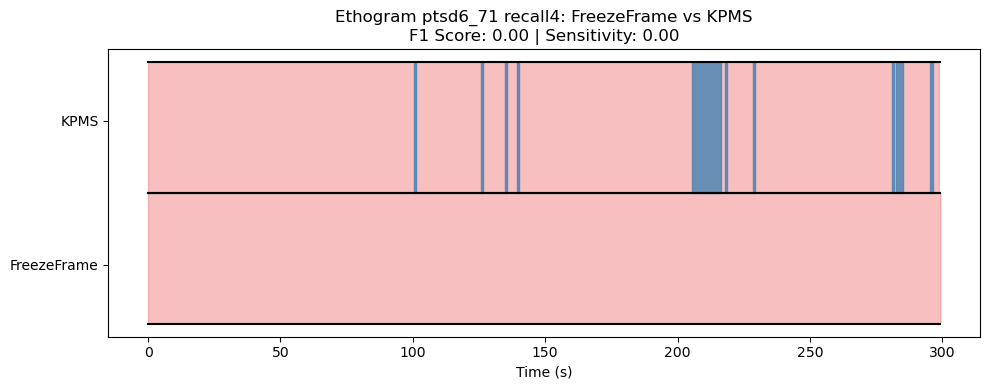

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd6_71, Day: recall4, F1 Score: 0.00, Sensitivity: 0.00


c:\Users\Chehaoy\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



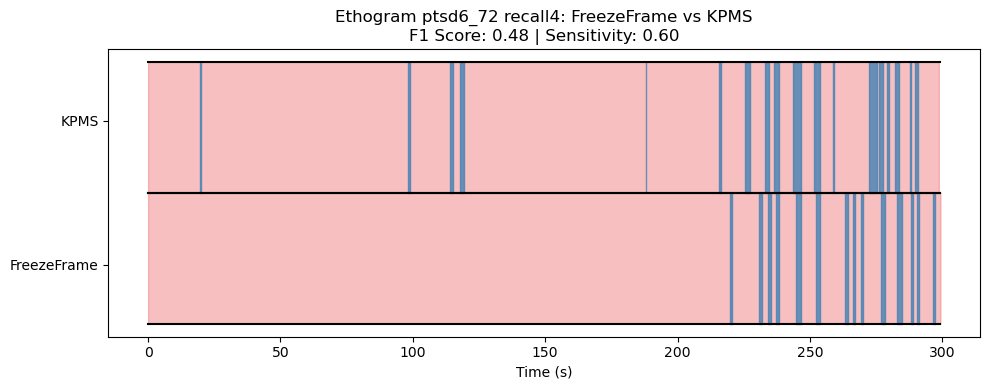

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd6_72, Day: recall4, F1 Score: 0.48, Sensitivity: 0.60


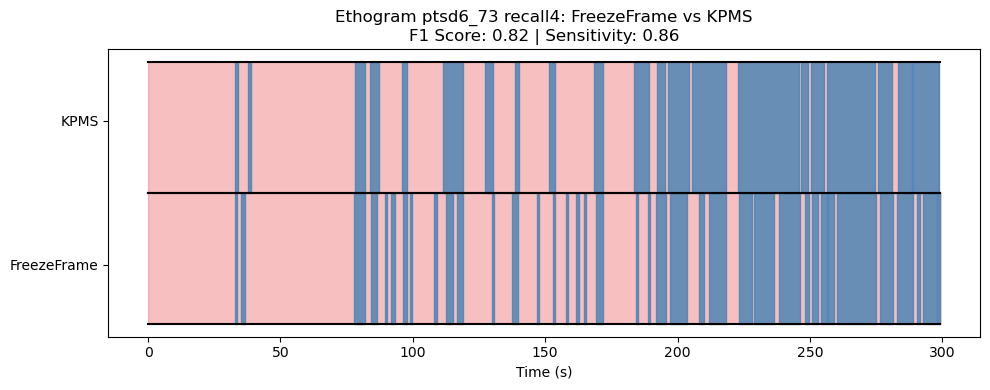

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd6_73, Day: recall4, F1 Score: 0.82, Sensitivity: 0.86


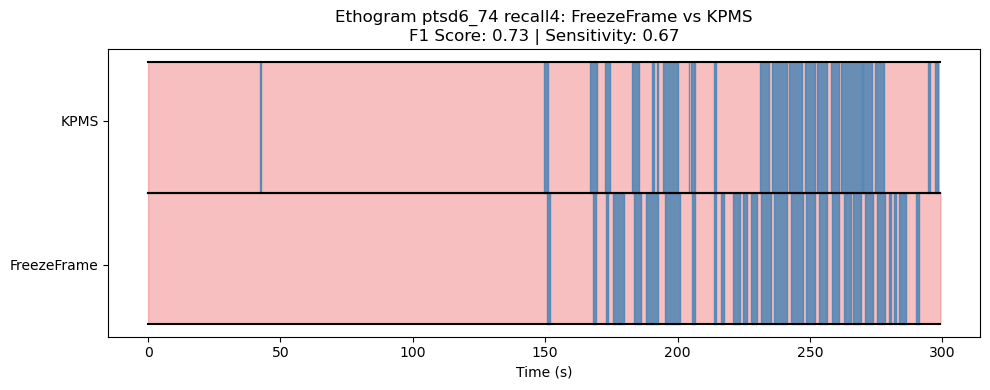

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd6_74, Day: recall4, F1 Score: 0.73, Sensitivity: 0.67


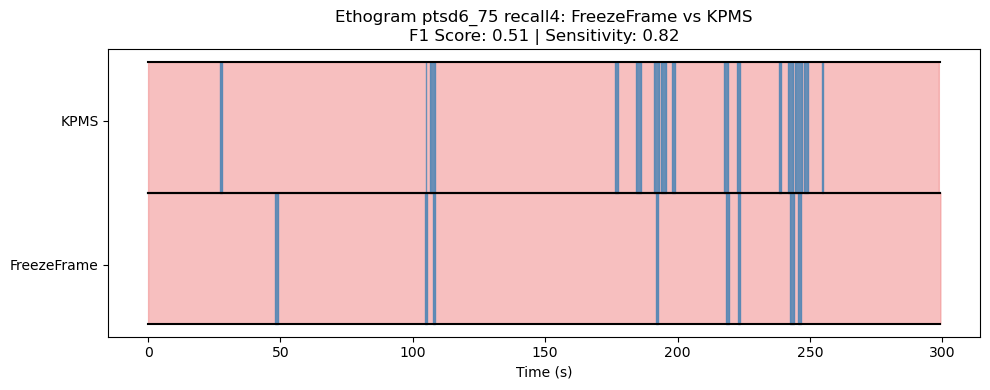

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd6_75, Day: recall4, F1 Score: 0.51, Sensitivity: 0.82


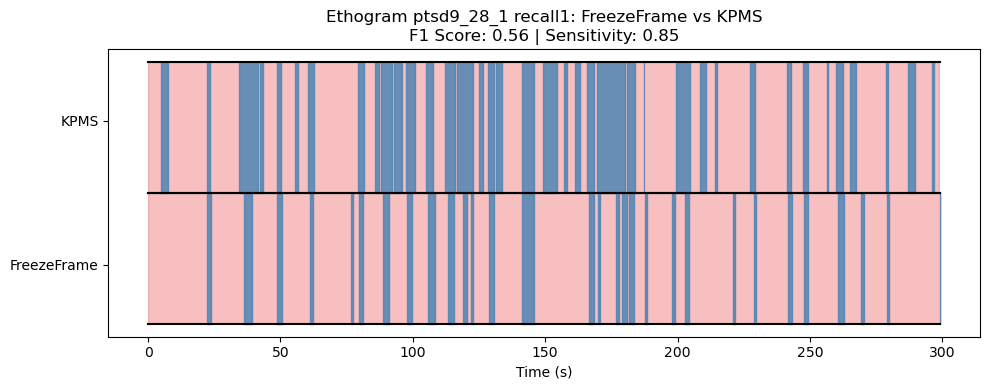

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_28_1, Day: recall1, F1 Score: 0.56, Sensitivity: 0.85


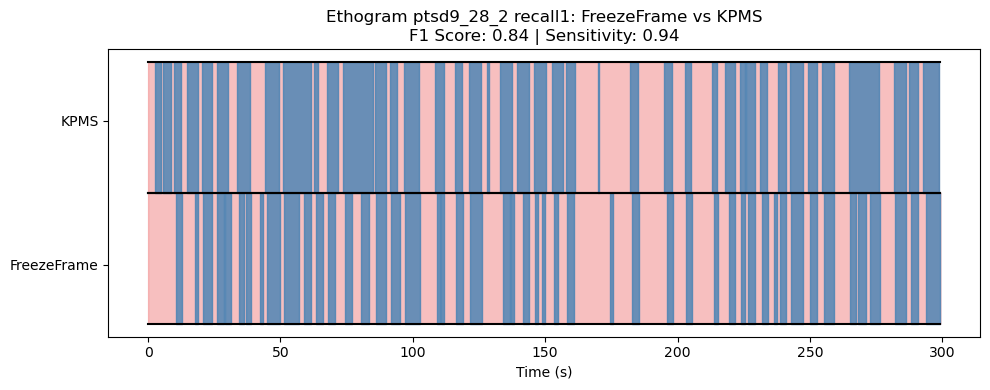

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_28_2, Day: recall1, F1 Score: 0.84, Sensitivity: 0.94


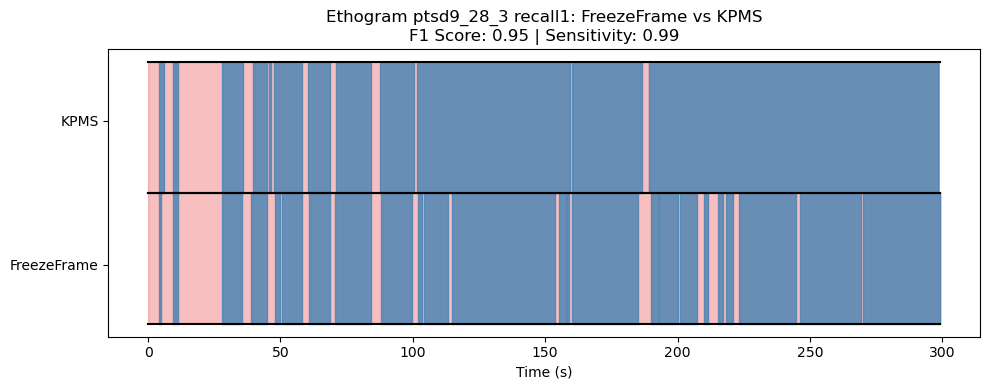

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_28_3, Day: recall1, F1 Score: 0.95, Sensitivity: 0.99


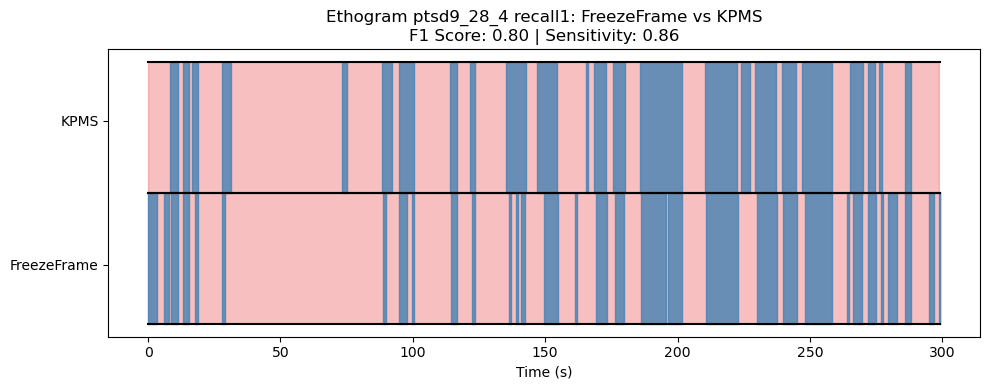

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_28_4, Day: recall1, F1 Score: 0.80, Sensitivity: 0.86


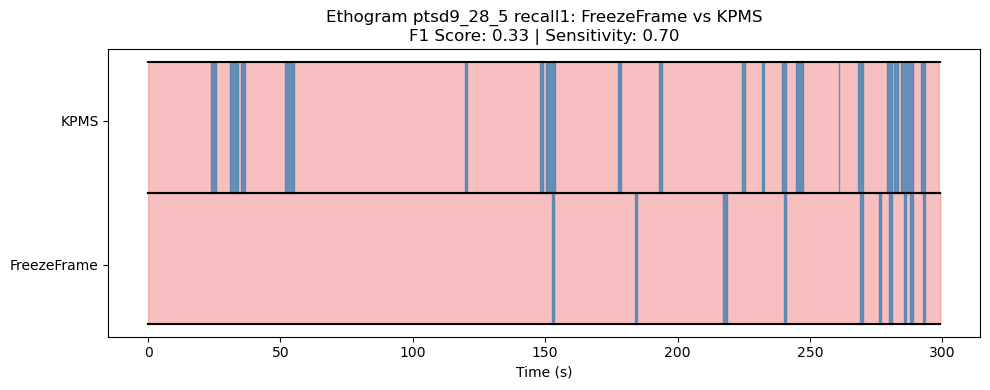

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_28_5, Day: recall1, F1 Score: 0.33, Sensitivity: 0.70


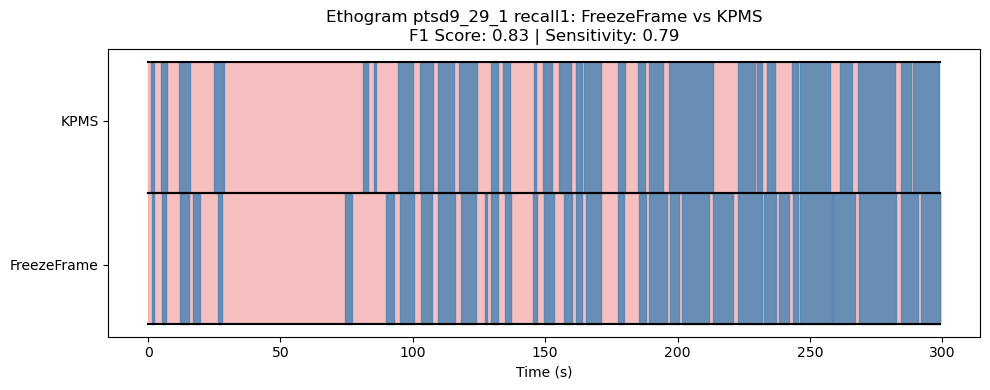

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_29_1, Day: recall1, F1 Score: 0.83, Sensitivity: 0.79


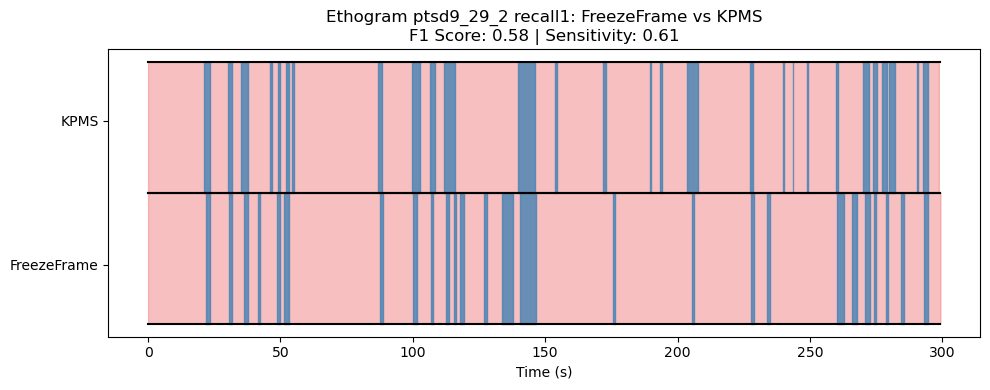

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_29_2, Day: recall1, F1 Score: 0.58, Sensitivity: 0.61


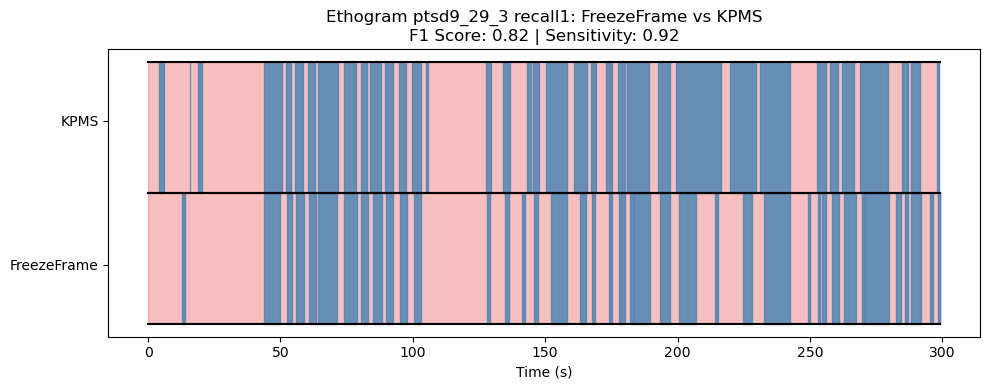

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_29_3, Day: recall1, F1 Score: 0.82, Sensitivity: 0.92


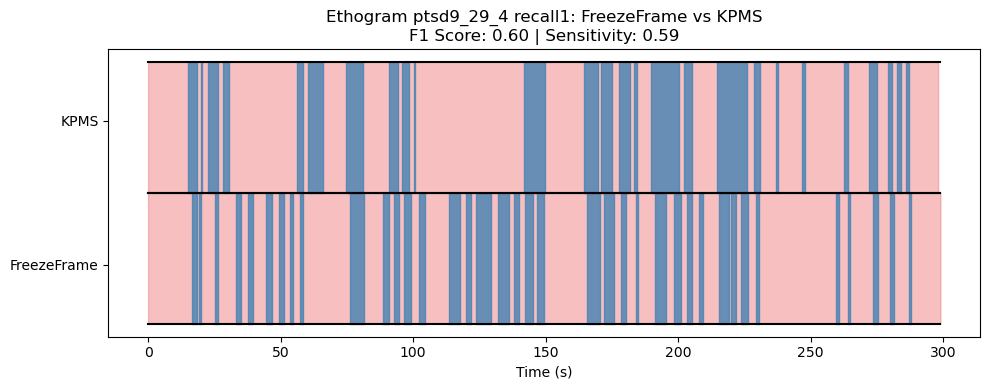

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_29_4, Day: recall1, F1 Score: 0.60, Sensitivity: 0.59


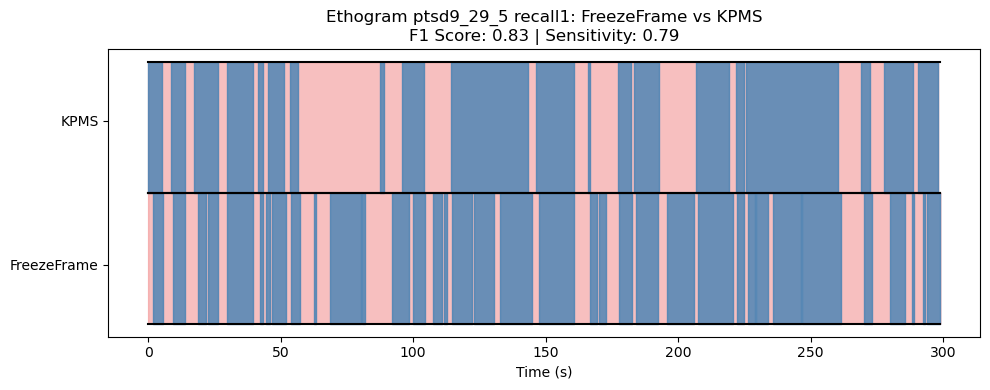

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_29_5, Day: recall1, F1 Score: 0.83, Sensitivity: 0.79


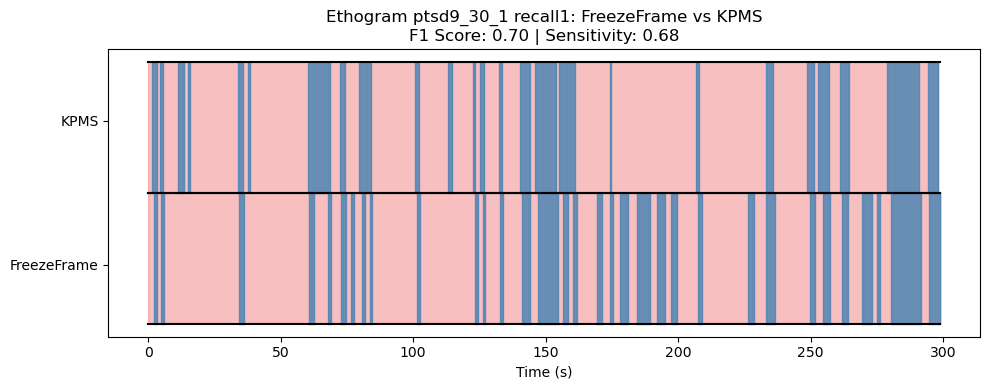

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_30_1, Day: recall1, F1 Score: 0.70, Sensitivity: 0.68


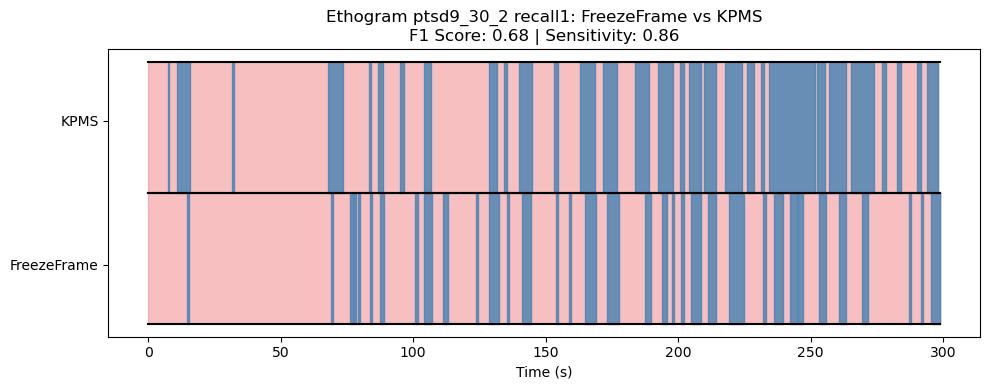

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_30_2, Day: recall1, F1 Score: 0.68, Sensitivity: 0.86


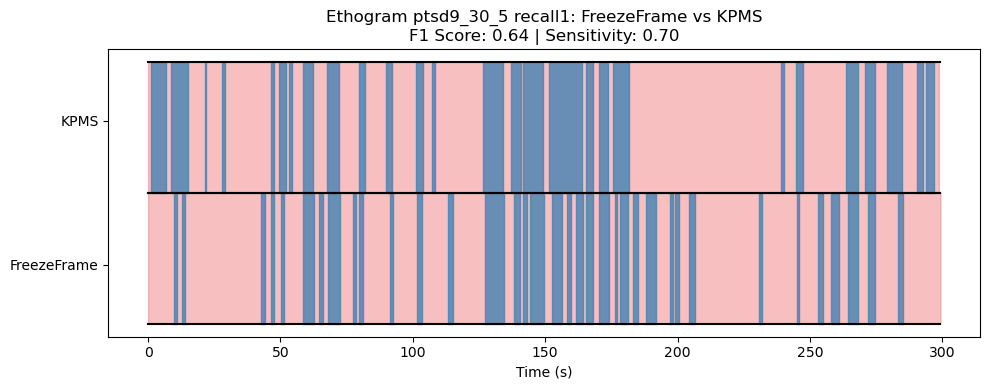

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_30_5, Day: recall1, F1 Score: 0.64, Sensitivity: 0.70


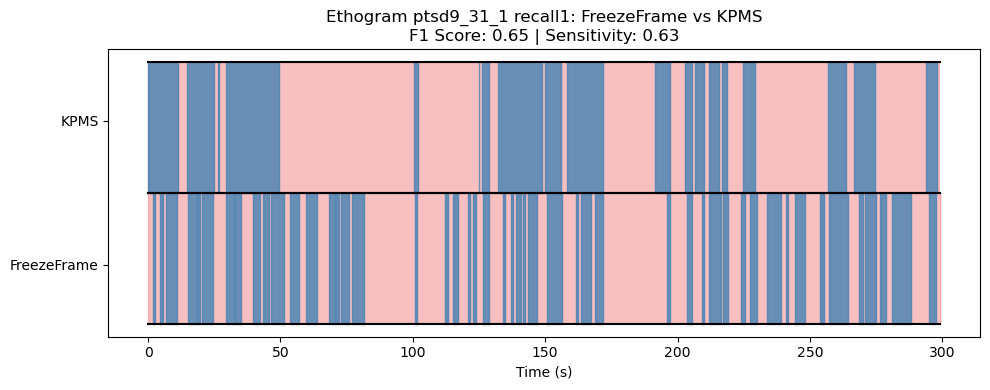

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_31_1, Day: recall1, F1 Score: 0.65, Sensitivity: 0.63


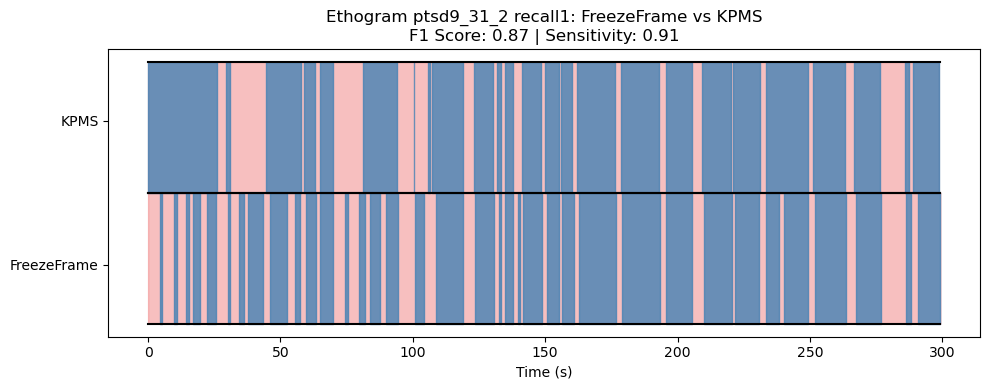

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_31_2, Day: recall1, F1 Score: 0.87, Sensitivity: 0.91


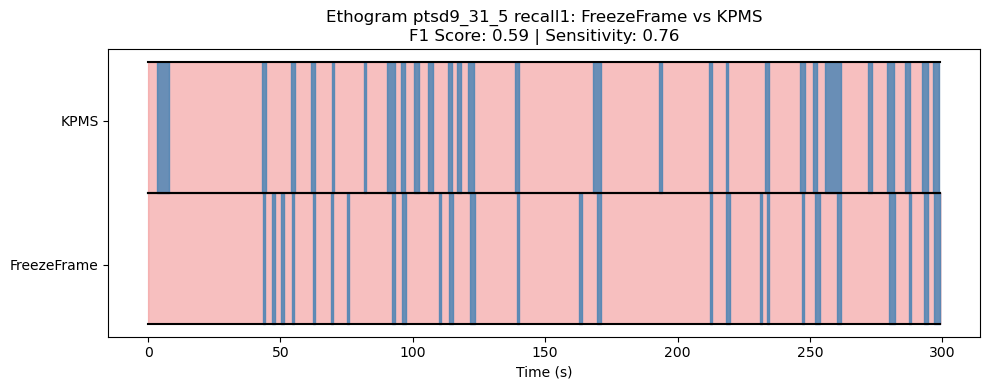

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_31_5, Day: recall1, F1 Score: 0.59, Sensitivity: 0.76


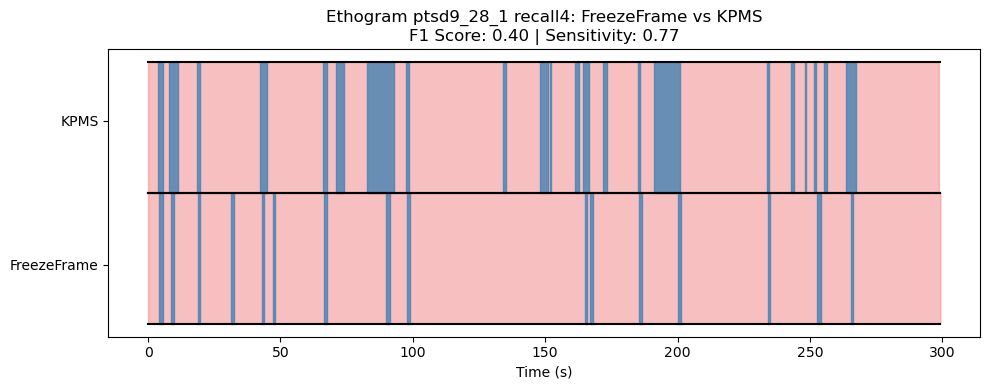

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_28_1, Day: recall4, F1 Score: 0.40, Sensitivity: 0.77


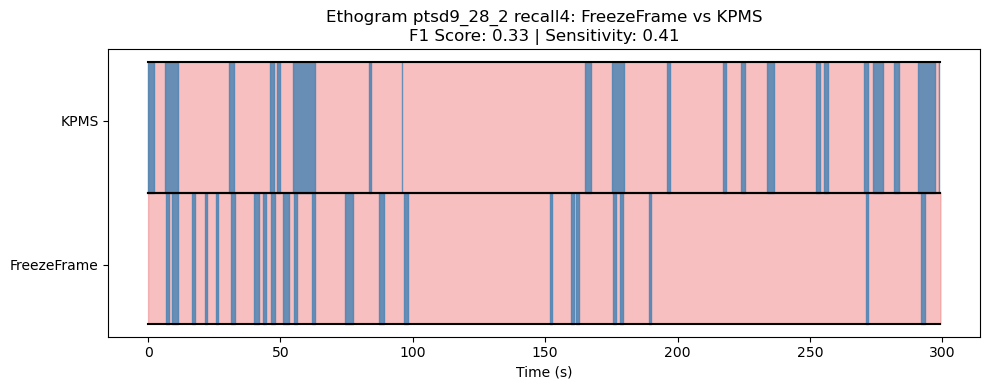

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_28_2, Day: recall4, F1 Score: 0.33, Sensitivity: 0.41


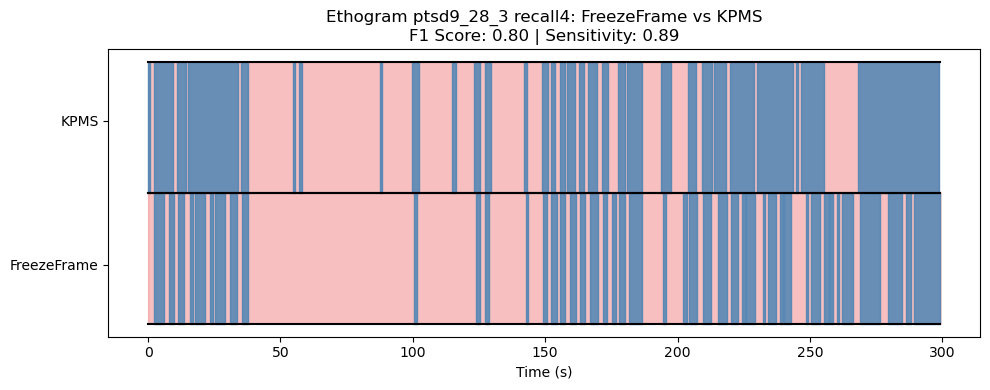

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_28_3, Day: recall4, F1 Score: 0.80, Sensitivity: 0.89


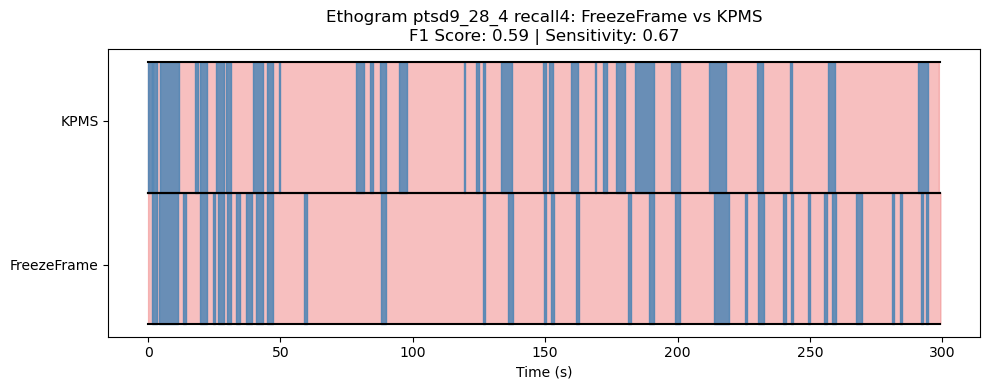

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_28_4, Day: recall4, F1 Score: 0.59, Sensitivity: 0.67


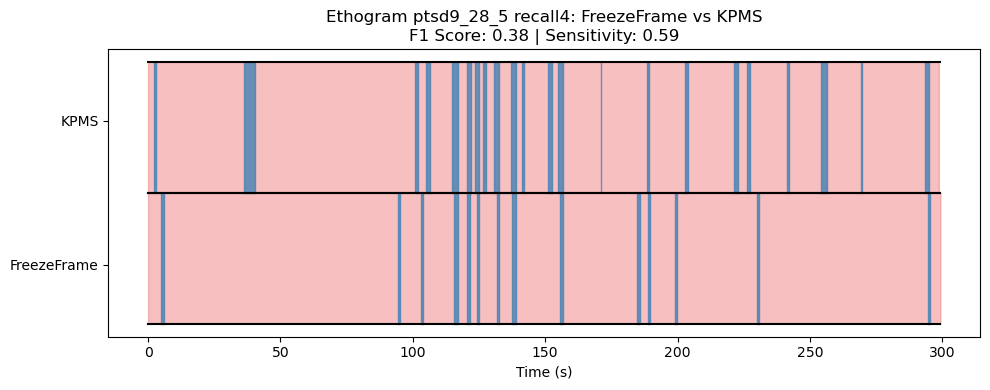

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_28_5, Day: recall4, F1 Score: 0.38, Sensitivity: 0.59


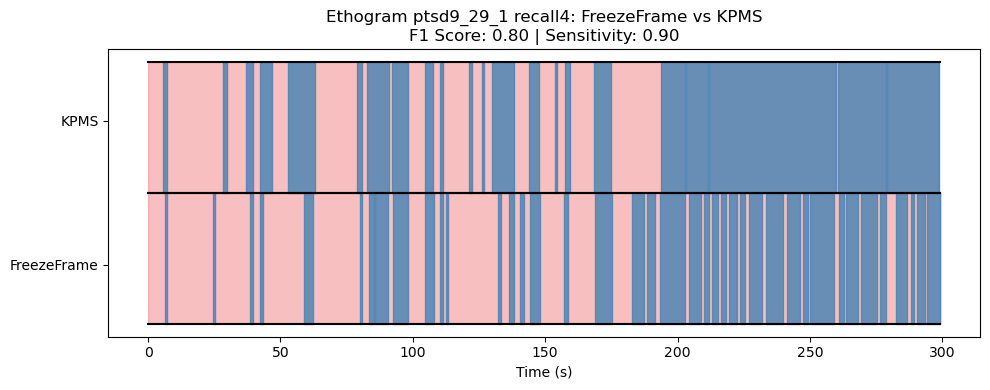

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_29_1, Day: recall4, F1 Score: 0.80, Sensitivity: 0.90


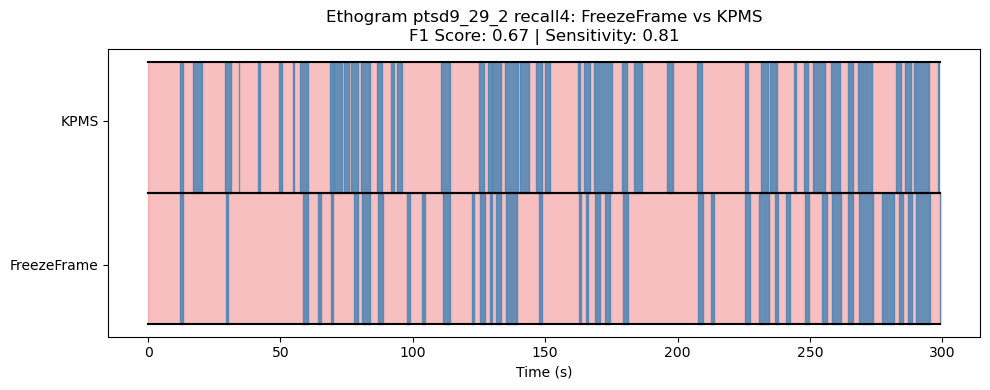

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_29_2, Day: recall4, F1 Score: 0.67, Sensitivity: 0.81


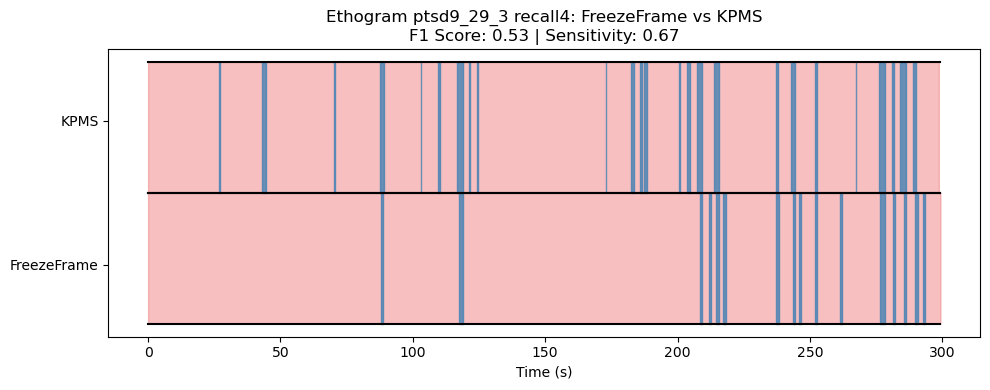

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_29_3, Day: recall4, F1 Score: 0.53, Sensitivity: 0.67


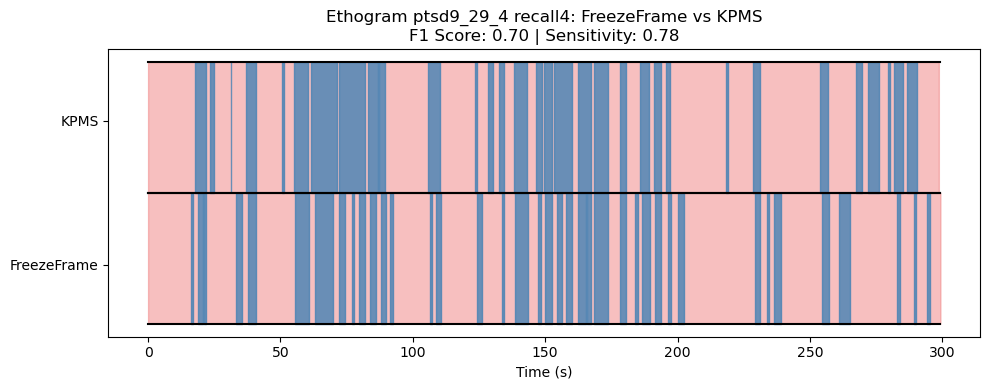

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_29_4, Day: recall4, F1 Score: 0.70, Sensitivity: 0.78


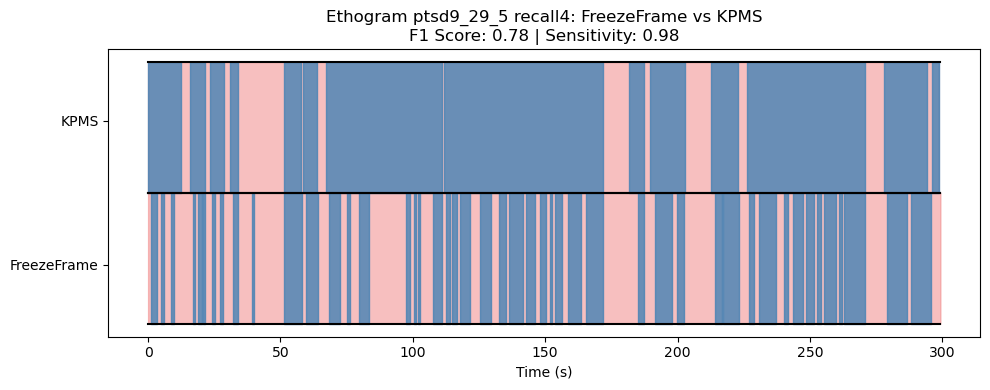

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_29_5, Day: recall4, F1 Score: 0.78, Sensitivity: 0.98


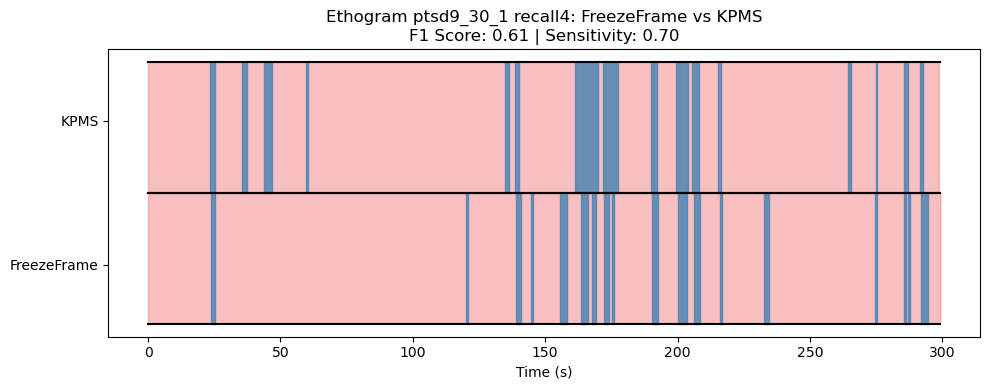

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_30_1, Day: recall4, F1 Score: 0.61, Sensitivity: 0.70


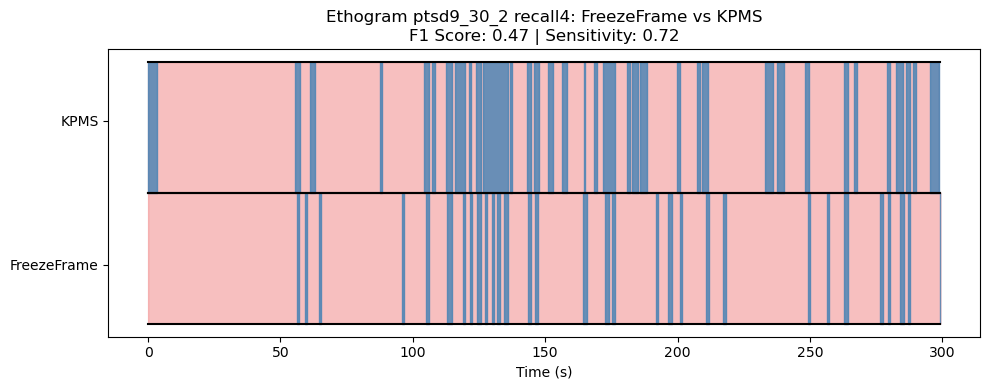

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_30_2, Day: recall4, F1 Score: 0.47, Sensitivity: 0.72


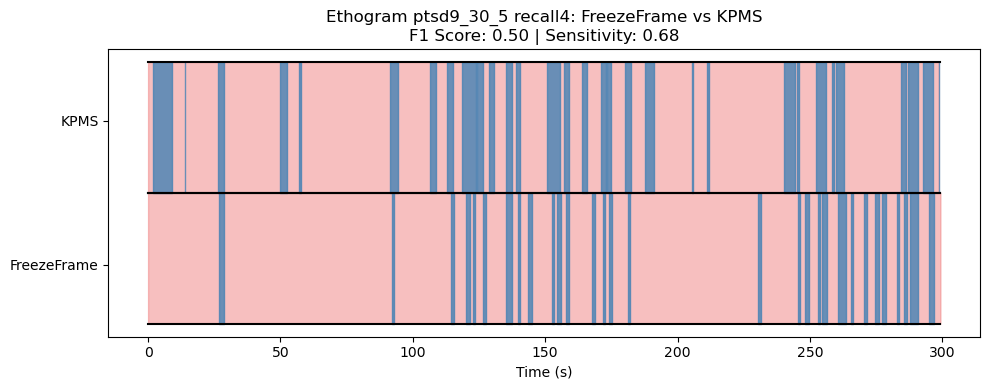

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_30_5, Day: recall4, F1 Score: 0.50, Sensitivity: 0.68


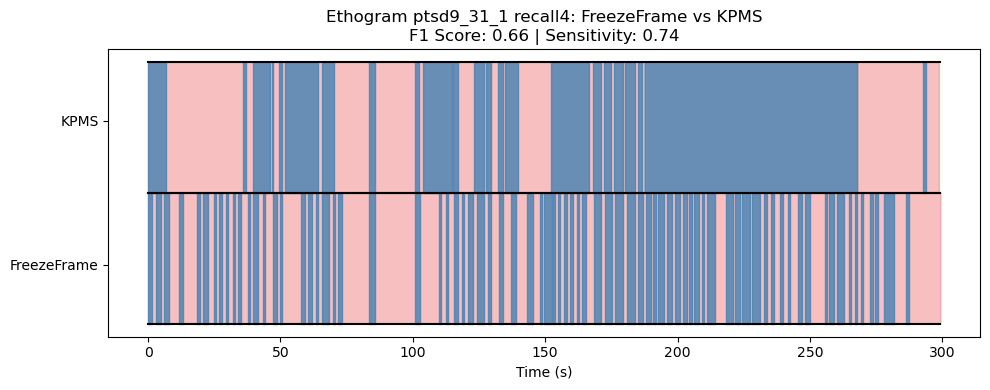

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_31_1, Day: recall4, F1 Score: 0.66, Sensitivity: 0.74


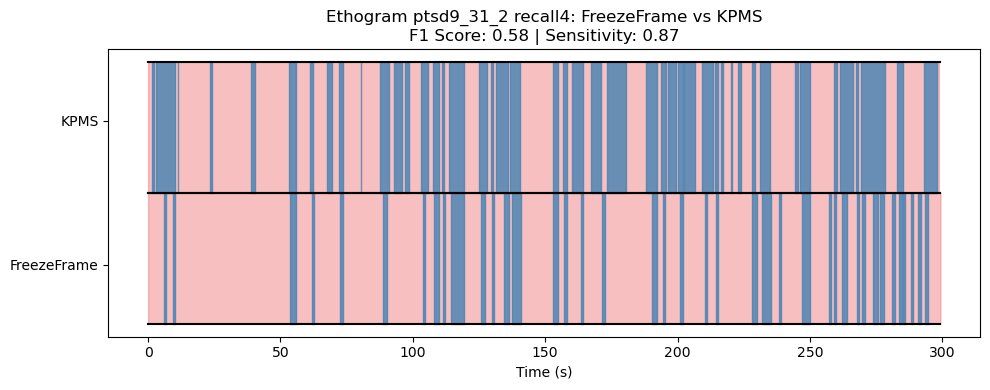

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_31_2, Day: recall4, F1 Score: 0.58, Sensitivity: 0.87


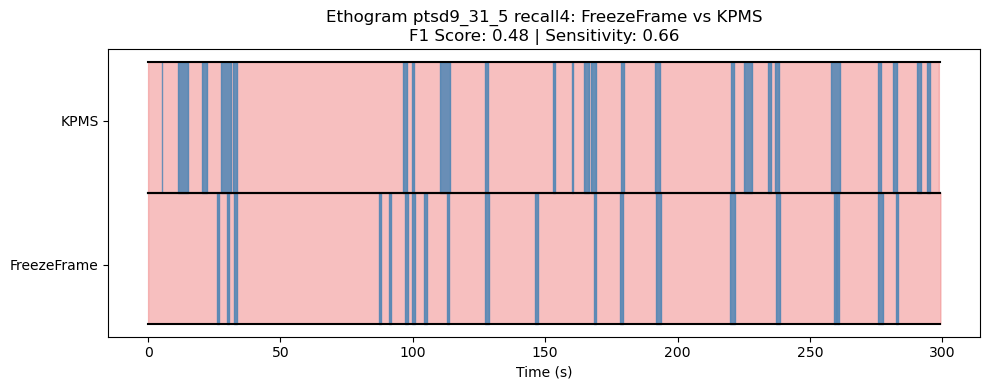

Unexpected condition: unknown
Plotted ethogram for Cohort ID: ptsd9_31_5, Day: recall4, F1 Score: 0.48, Sensitivity: 0.66

F1 & Sensitivity Scores Summary:
Average F1 Score: 0.58
Average Sensitivity: 0.70


In [11]:
plot_all_ethograms(ff_data_1, kp_data, plot_func=plot_freeze_ethogram)

In [12]:
# # Select all rows where relative_time == 0
# transition_points = kpms_mobile[kpms_mobile['relative_time'] == 0].copy()

# # Find previous row (i.e., closest frame before the transition)
# for i in range(len(transition_points)):
#     # Get index of the transition row
#     idx = transition_points.index[i]
    
#     # Find the previous frame (if available)
#     prev_idx = idx - 1  # Assuming rows are sequential in time
    
#     if prev_idx in kpms_mobile.index:
#         prev_syllable = kpms_mobile.loc[prev_idx, 'syllable']
#         transition_syllable = kpms_mobile.loc[idx, 'syllable']

#         # Check if the syllable changed
#         transition_points.at[idx, 'syllable_changed'] = int(prev_syllable != transition_syllable)

# # Count how many times syllable changed at transition
# num_changes = transition_points['syllable_changed'].sum()

# print(f"Number of transitions where syllable changed: {num_changes}")

# transition_points.shape

# transition_points['syllable_changed'].value_counts(normalize=True)

